In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [ ]:
from matplotlib.font_manager import fontManager, FontProperties

# Download here: https://www.dafontfree.io/big-shoulders-display-font/
font = {'fontname': 'Big Shoulders Display'}

fontManager.addfont("/content/big-shoulders-display.regular.ttf")
fontManager.addfont("/content/big-shoulders-display.bold.ttf")

# Importing and cleaning training dataset

In [ ]:
# Download the dataset @ https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data
kaggle_dataset_path = '/content/Wellbeing_and_lifestyle_data_Kaggle.csv'
kaggle_df = pd.read_csv(kaggle_dataset_path)

In [ ]:
kaggle_df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000,14033.000000
mean,2.932659,5.313262,5.486567,5.563885,6.509300,3.962944,2.694078,1.402979,5.709471,3.139386,5.700919,3.707404,7.041901,2.860614,2.920972,1.726929,5.695218,3.266230,6.255113,666.542735
std,1.448748,3.315023,2.844378,3.248706,3.082103,2.748700,1.860241,0.490514,2.631714,2.333378,2.884188,3.239585,1.199444,3.679985,2.687991,0.445553,3.102343,2.714033,3.024895,45.546463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000
25%,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,635.700000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,2.000000,7.000000,667.500000
75%,4.000000,8.000000,8.000000,9.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [ ]:
kaggle_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [ ]:
kaggle_df['DAILY_STRESS'].unique(), kaggle_df['AGE'].unique(), kaggle_df['GENDER'].unique(), kaggle_df.shape


(array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object),
 array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 (14033, 24))

In [ ]:
kaggle_df_cleaned = kaggle_df[kaggle_df['DAILY_STRESS'] != '1/1/00']

kaggle_df_cleaned.loc['DAILY_STRESS'] = pd.to_numeric(kaggle_df_cleaned['DAILY_STRESS'])

In [ ]:
nan_rows = kaggle_df_cleaned[kaggle_df_cleaned.isnull().any(axis=1)]
nan_rows

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
DAILY_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
kaggle_df_cleaned = kaggle_df_cleaned.dropna()

In [ ]:
label_encoder_age = LabelEncoder()
label_encoder_gender = LabelEncoder()

kaggle_df_cleaned['AGE'] = label_encoder_age.fit_transform(kaggle_df_cleaned['AGE'])
kaggle_df_cleaned['GENDER'] = label_encoder_gender.fit_transform(kaggle_df_cleaned['GENDER'])

In [ ]:
kaggle_df_final = kaggle_df_cleaned

kaggle_df_final.drop(['Timestamp'], axis=1, inplace=True)

In [ ]:
kaggle_df_final['WORK_LIFE_BALANCE_SCORE'].describe()

count    14032.000000
mean       666.541591
std         45.547884
min          6.000000
25%        635.675000
50%        667.500000
75%        698.500000
max        820.200000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

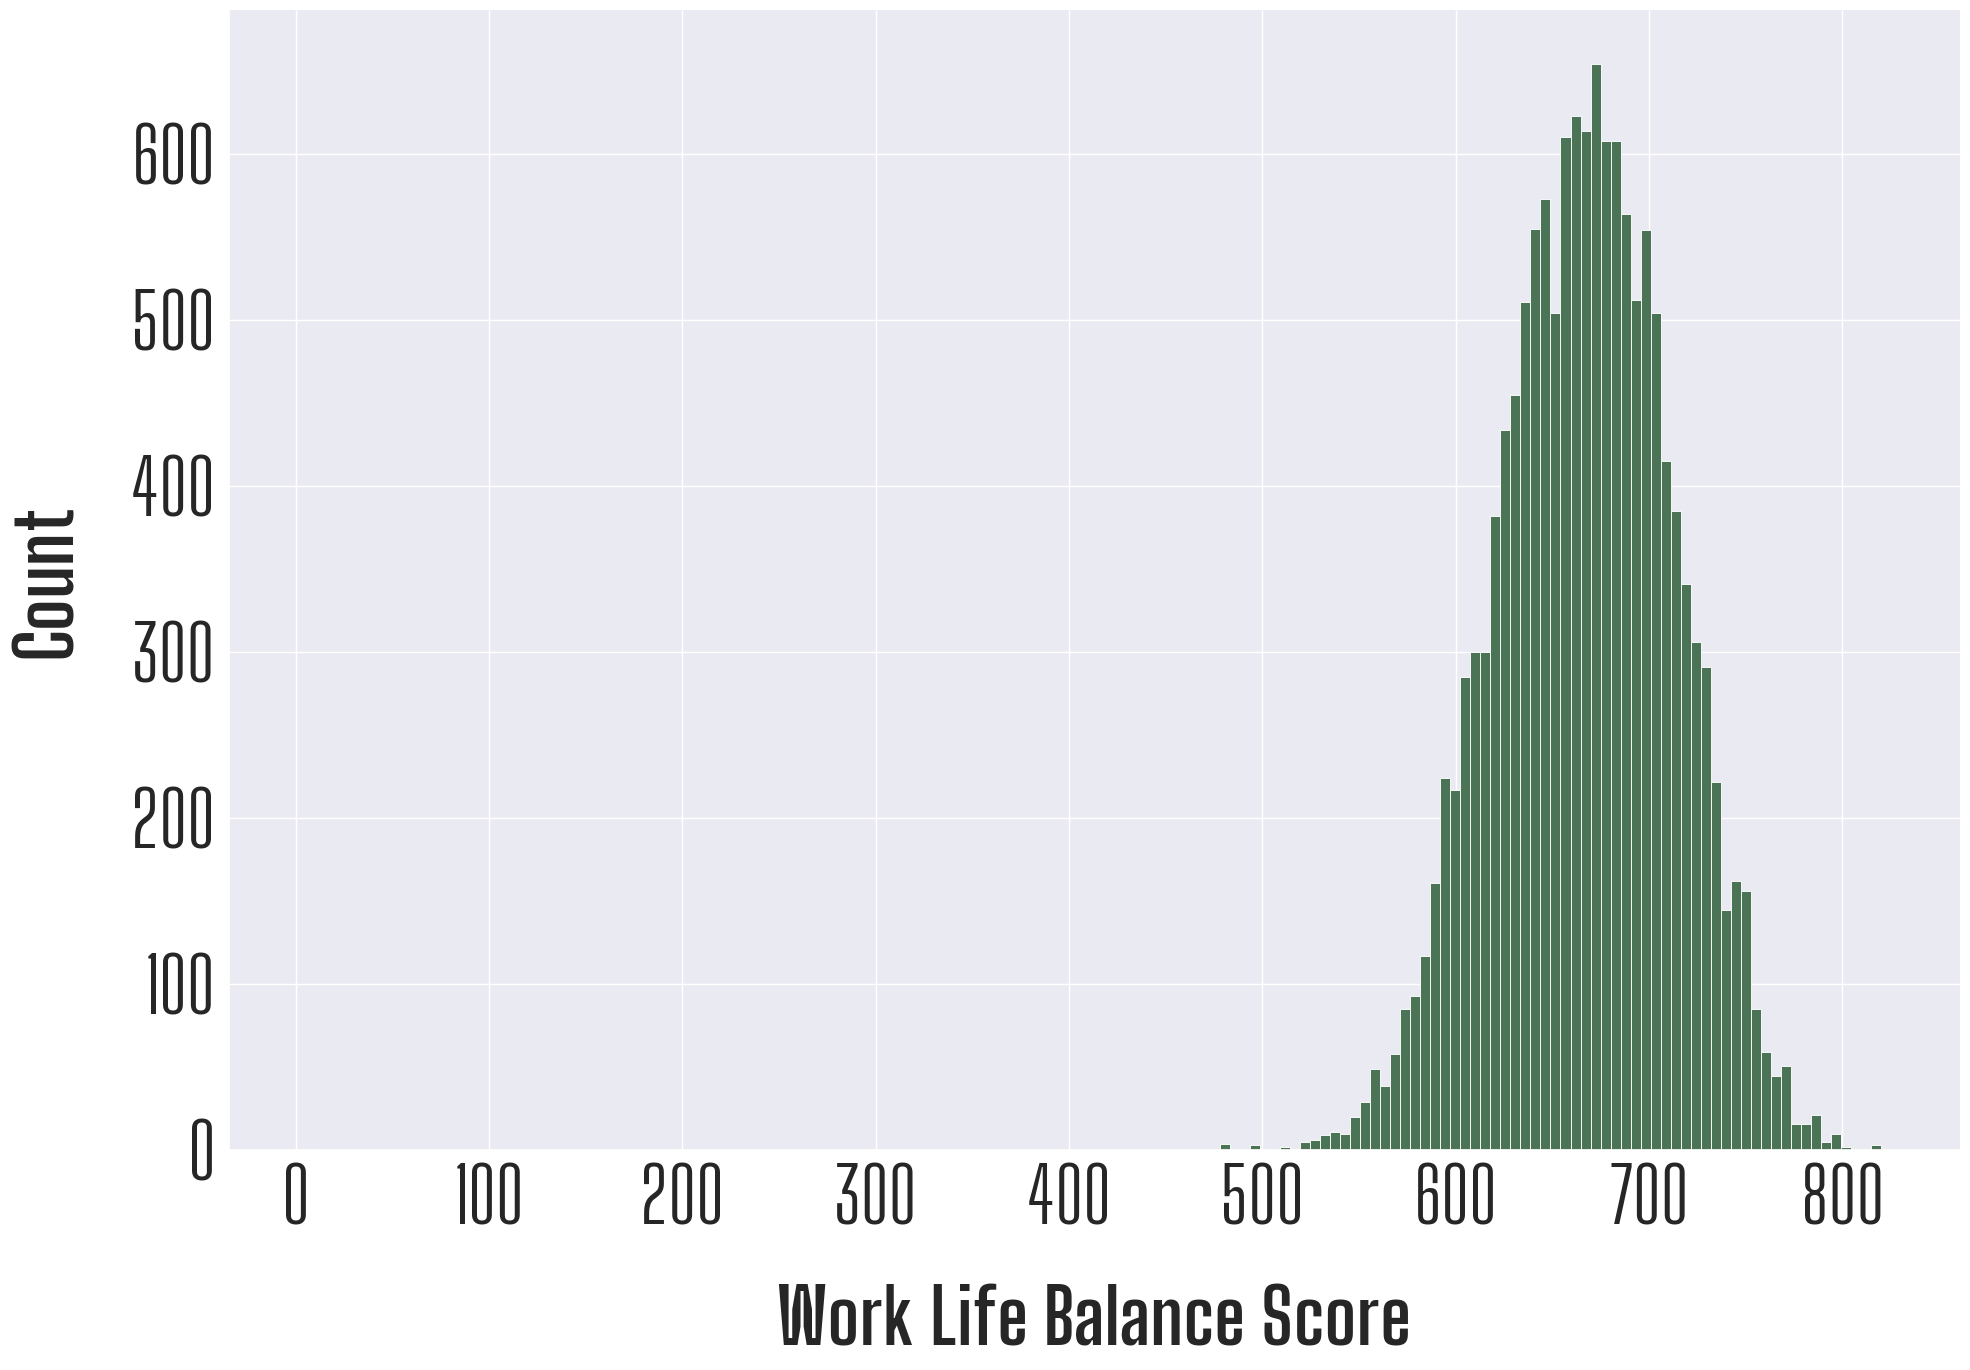

In [ ]:
sns.set_theme()
plt.figure(figsize=(20, 14))
sns.histplot(kaggle_df_final['WORK_LIFE_BALANCE_SCORE'], color='#4B7355', alpha=1)
plt.xlabel('Work Life Balance Score', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Count', fontsize=54, fontweight='bold', labelpad=32, ** font)

plt.xticks(fontsize=54, **font)
plt.yticks(fontsize=54, **font)

sns.despine(top=True, right=True)

plt.tight_layout(pad=1.5)

In [ ]:
# Save the bins ranges now to categorize accordingly the survey data
_, ten_bins = pd.cut(kaggle_df_final['WORK_LIFE_BALANCE_SCORE'], bins=10, retbins=True)

In [ ]:
kaggle_df_final.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3.0,2,2.0,5.0,0.0,5.0,2.0,0.0,1.0,6.0,...,7.0,5.0,5.0,1.0,4.0,0.0,5.0,1,0,609.5
1,2.0,3,4.0,3.0,8.0,10.0,5.0,2.0,2.0,5.0,...,8.0,2.0,2.0,2.0,3.0,2.0,6.0,1,0,655.6
2,2.0,3,3.0,4.0,4.0,10.0,3.0,2.0,2.0,2.0,...,8.0,10.0,2.0,2.0,4.0,8.0,3.0,1,0,631.6
3,3.0,3,10.0,3.0,10.0,7.0,2.0,5.0,2.0,3.0,...,5.0,7.0,5.0,1.0,5.0,2.0,0.0,2,0,622.7
4,5.0,1,3.0,3.0,10.0,4.0,2.0,4.0,2.0,5.0,...,7.0,0.0,0.0,2.0,8.0,1.0,5.0,2,0,663.9


# Splitting dataset for train and validation

In [ ]:
X = kaggle_df_final.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y = kaggle_df_final['WORK_LIFE_BALANCE_SCORE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_val)

In [ ]:
predictions = rf_regressor.predict(X_val)

mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 13.213803666388213
Mean Squared Error (MSE): 274.08467989316426
Root Mean Squared Error (RMSE): 16.555503009367136
R-squared (Coefficient of Determination): 0.8577218864646432


In [ ]:
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_val, y_test_pred)

print(f"RMSE on Training Set: {np.sqrt(mse_train):.3f}")
print(f"RMSE on Test Set: {np.sqrt(mse_test):.3f}")

RMSE on Training Set: 14.119
RMSE on Test Set: 16.556


# AdaBoost Regression

In [ ]:
ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                                  n_estimators=500, learning_rate=1.5, random_state=42)

ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=1.5, n_estimators=500, random_state=42)

In [ ]:
y_pred = ada_regressor.predict(X_val)

In [ ]:
predictions = ada_regressor.predict(X_val)

mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 9.169739844225836
Mean Squared Error (MSE): 133.7389658165954
Root Mean Squared Error (RMSE): 11.56455644703226
R-squared (Coefficient of Determination): 0.9305757338572453


In [ ]:
y_train_pred = ada_regressor.predict(X_train)
y_test_pred = ada_regressor.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_val, y_test_pred)

print(f"RMSE on Training Set: {np.sqrt(mse_train):.3f}")
print(f"RMSE on Test Set: {np.sqrt(mse_test):.3f}")

RMSE on Training Set: 11.043
RMSE on Test Set: 11.565


# Gradient Boosting Regression

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=10000, max_depth=1, random_state=42)

gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=10000, random_state=42)

In [ ]:
y_pred = gb_regressor.predict(X_val)

In [ ]:
predictions = gb_regressor.predict(X_val)

mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 0.1359198973701772
Mean Squared Error (MSE): 0.0314795291572172
Root Mean Squared Error (RMSE): 0.1774247140542072
R-squared (Coefficient of Determination): 0.9999836588895621


In [ ]:
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_val, y_test_pred)

print(f"RMSE on Training Set: {np.sqrt(mse_train):.3f}")
print(f"RMSE on Test Set: {np.sqrt(mse_test):.3f}")

RMSE on Training Set: 0.172
RMSE on Test Set: 0.177


In [ ]:
scores = cross_val_score(gb_regressor, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(-scores)

[0.17971981 0.18832814 0.20347188 0.21609631 0.19607119 0.17847042
 0.19125805 0.18557825 0.16610608 0.1823369 ]


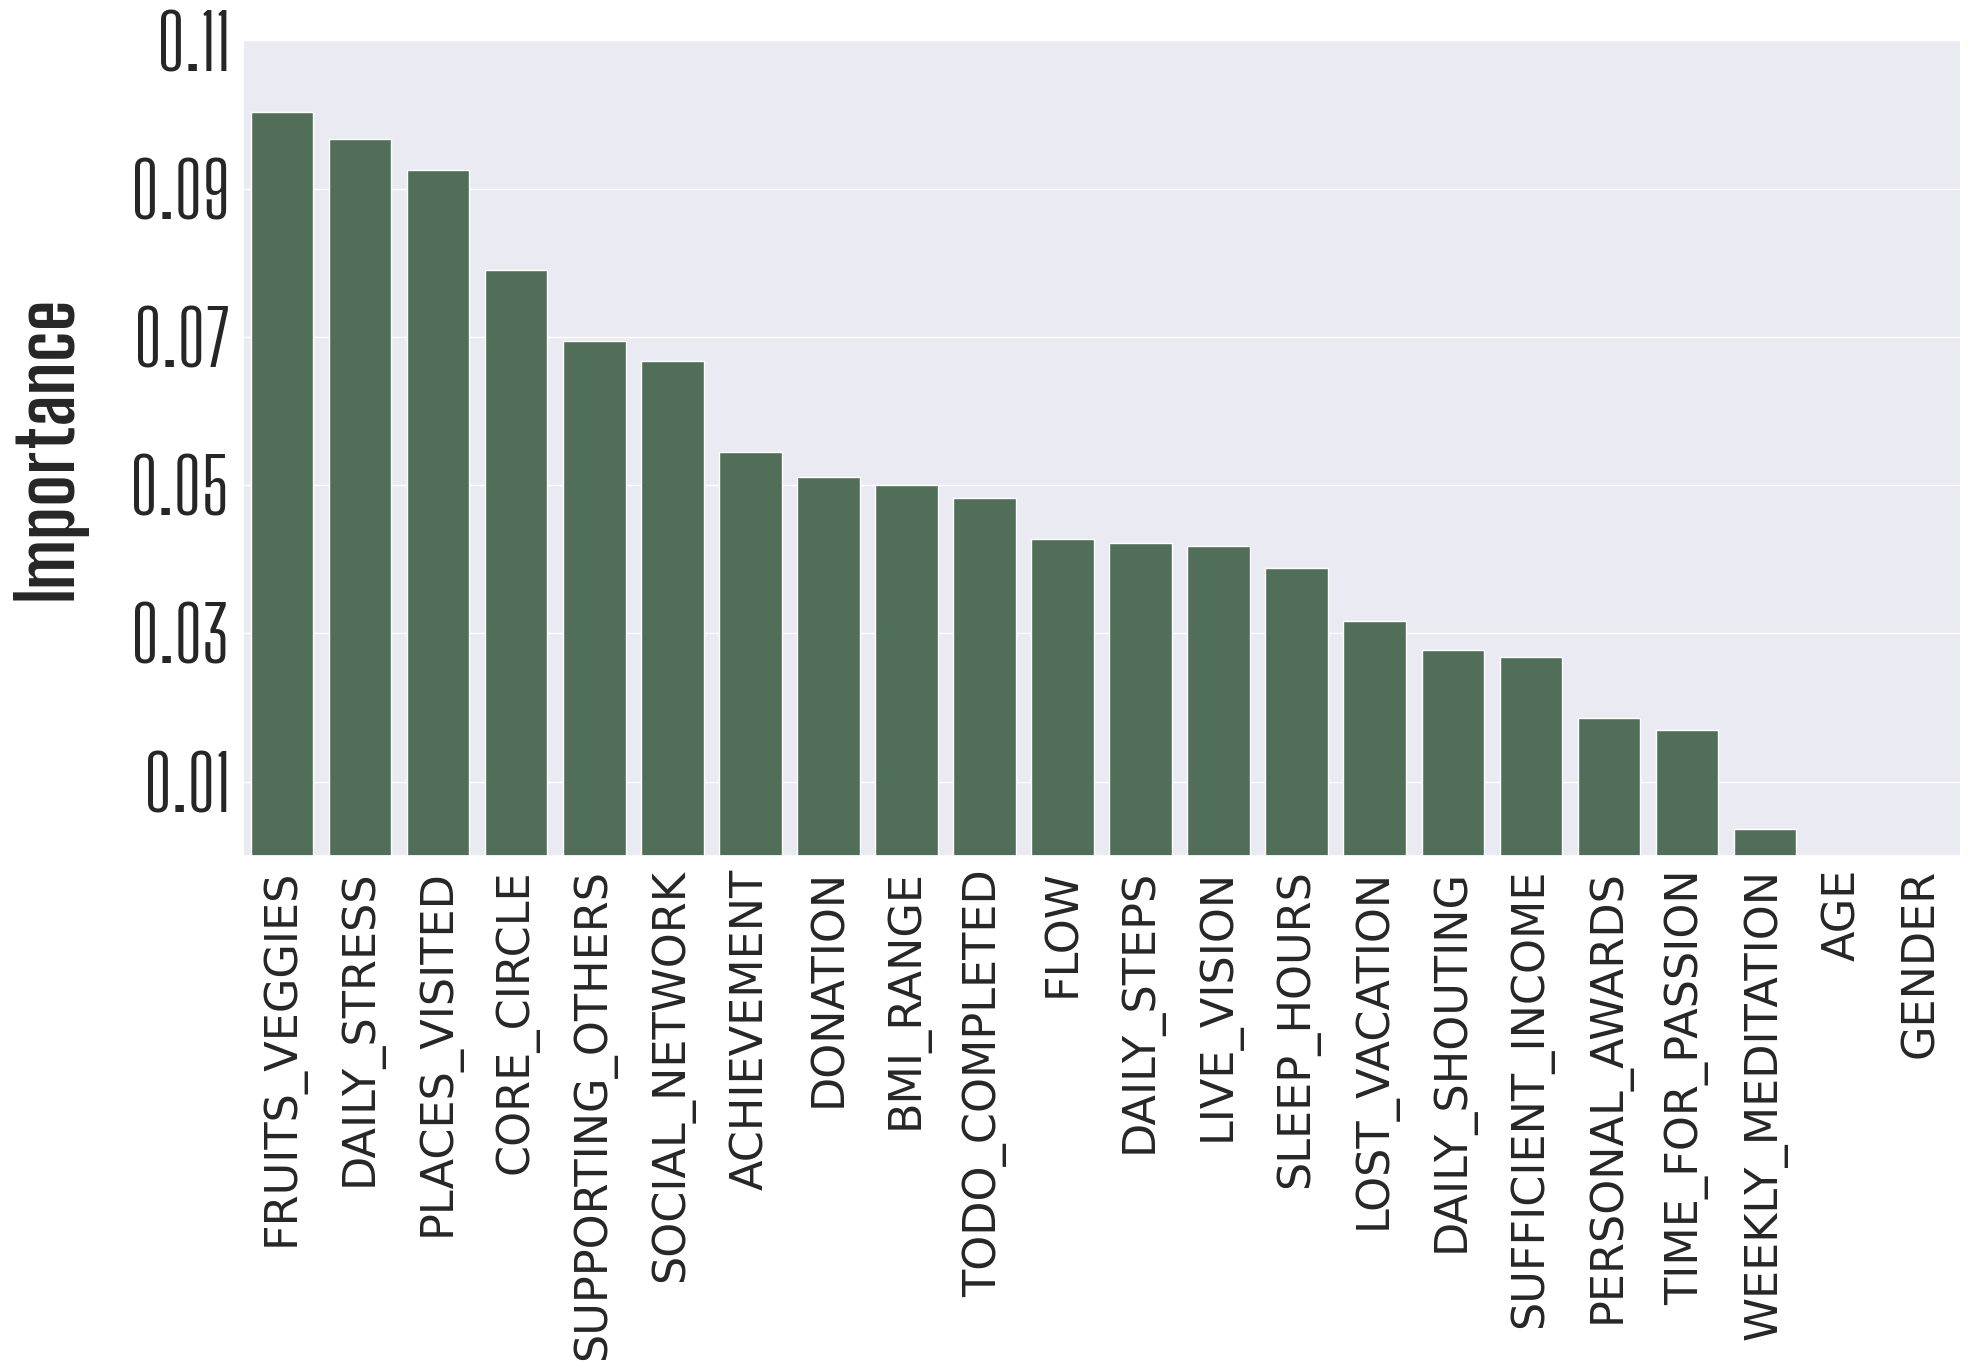

In [ ]:
importances = gb_regressor.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

sns.set_theme()
plt.figure(figsize=(20, 14))
sns.barplot(x=feature_names, y=importances[indices], color='#4B7355', alpha=1)

# plt.title('Feature Importances', fontsize=54, fontweight='bold', pad=32)
plt.xlabel('', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Importance', fontsize=54, fontweight='bold', labelpad=32, **font)

plt.xticks(fontsize=32, rotation=90)
plt.yticks([0.01, 0.03, 0.05, 0.07, 0.09, 0.11], fontsize=54, **font)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.5)

# XGBoost Regression

In [ ]:
kaggle_df_final_xgb = kaggle_df_final

In [ ]:
kaggle_df_final_xgb.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3.0,2,2.0,5.0,0.0,5.0,2.0,0.0,1.0,6.0,...,7.0,5.0,5.0,1.0,4.0,0.0,5.0,1,0,609.5
1,2.0,3,4.0,3.0,8.0,10.0,5.0,2.0,2.0,5.0,...,8.0,2.0,2.0,2.0,3.0,2.0,6.0,1,0,655.6
2,2.0,3,3.0,4.0,4.0,10.0,3.0,2.0,2.0,2.0,...,8.0,10.0,2.0,2.0,4.0,8.0,3.0,1,0,631.6
3,3.0,3,10.0,3.0,10.0,7.0,2.0,5.0,2.0,3.0,...,5.0,7.0,5.0,1.0,5.0,2.0,0.0,2,0,622.7
4,5.0,1,3.0,3.0,10.0,4.0,2.0,4.0,2.0,5.0,...,7.0,0.0,0.0,2.0,8.0,1.0,5.0,2,0,663.9


In [ ]:
label_encoder = LabelEncoder()
kaggle_df_final_xgb['DAILY_STRESS'] = label_encoder.fit_transform(kaggle_df_final_xgb['DAILY_STRESS'])

X = kaggle_df_final_xgb.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y = kaggle_df_final_xgb['WORK_LIFE_BALANCE_SCORE']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER
5653,3.0,4,7.0,3.0,3.0,3.0,2.0,5.0,2.0,6.0,...,0.0,8.0,0.0,4.0,2.0,8.0,1.0,6.0,0,1
2456,5.0,2,5.0,10.0,10.0,10.0,6.0,5.0,2.0,5.0,...,8.0,6.0,3.0,3.0,2.0,7.0,10.0,10.0,1,0
702,3.0,1,6.0,8.0,5.0,10.0,9.0,4.0,2.0,5.0,...,10.0,6.0,0.0,10.0,2.0,5.0,2.0,7.0,3,0
12479,2.0,2,10.0,7.0,4.0,10.0,8.0,5.0,1.0,3.0,...,2.0,5.0,0.0,3.0,2.0,8.0,1.0,8.0,3,0
1443,3.0,5,4.0,3.0,6.0,6.0,3.0,5.0,1.0,3.0,...,1.0,8.0,0.0,10.0,1.0,2.0,1.0,10.0,1,0


In [ ]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=20000, max_depth=1, seed=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = xgb_regressor.predict(X_val)

mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 0.002828428360964707
Mean Squared Error (MSE): 1.3839224088177812e-05
Root Mean Squared Error (RMSE): 0.0037201107628910476
R-squared (Coefficient of Determination): 0.9999999928160206


In [ ]:
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_val, y_test_pred)

print(f"RMSE on Training Set: {np.sqrt(mse_train):.3f}")
print(f"RMSE on Test Set: {np.sqrt(mse_test):.3f}")

RMSE on Training Set: 0.004
RMSE on Test Set: 0.004


In [ ]:
scores = cross_val_score(xgb_regressor, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(-scores)

[0.00523644 0.00415038 0.00403804 0.00304012 0.00372194 0.00509027
 0.00436388 0.00394249 0.00516623 0.00385703]


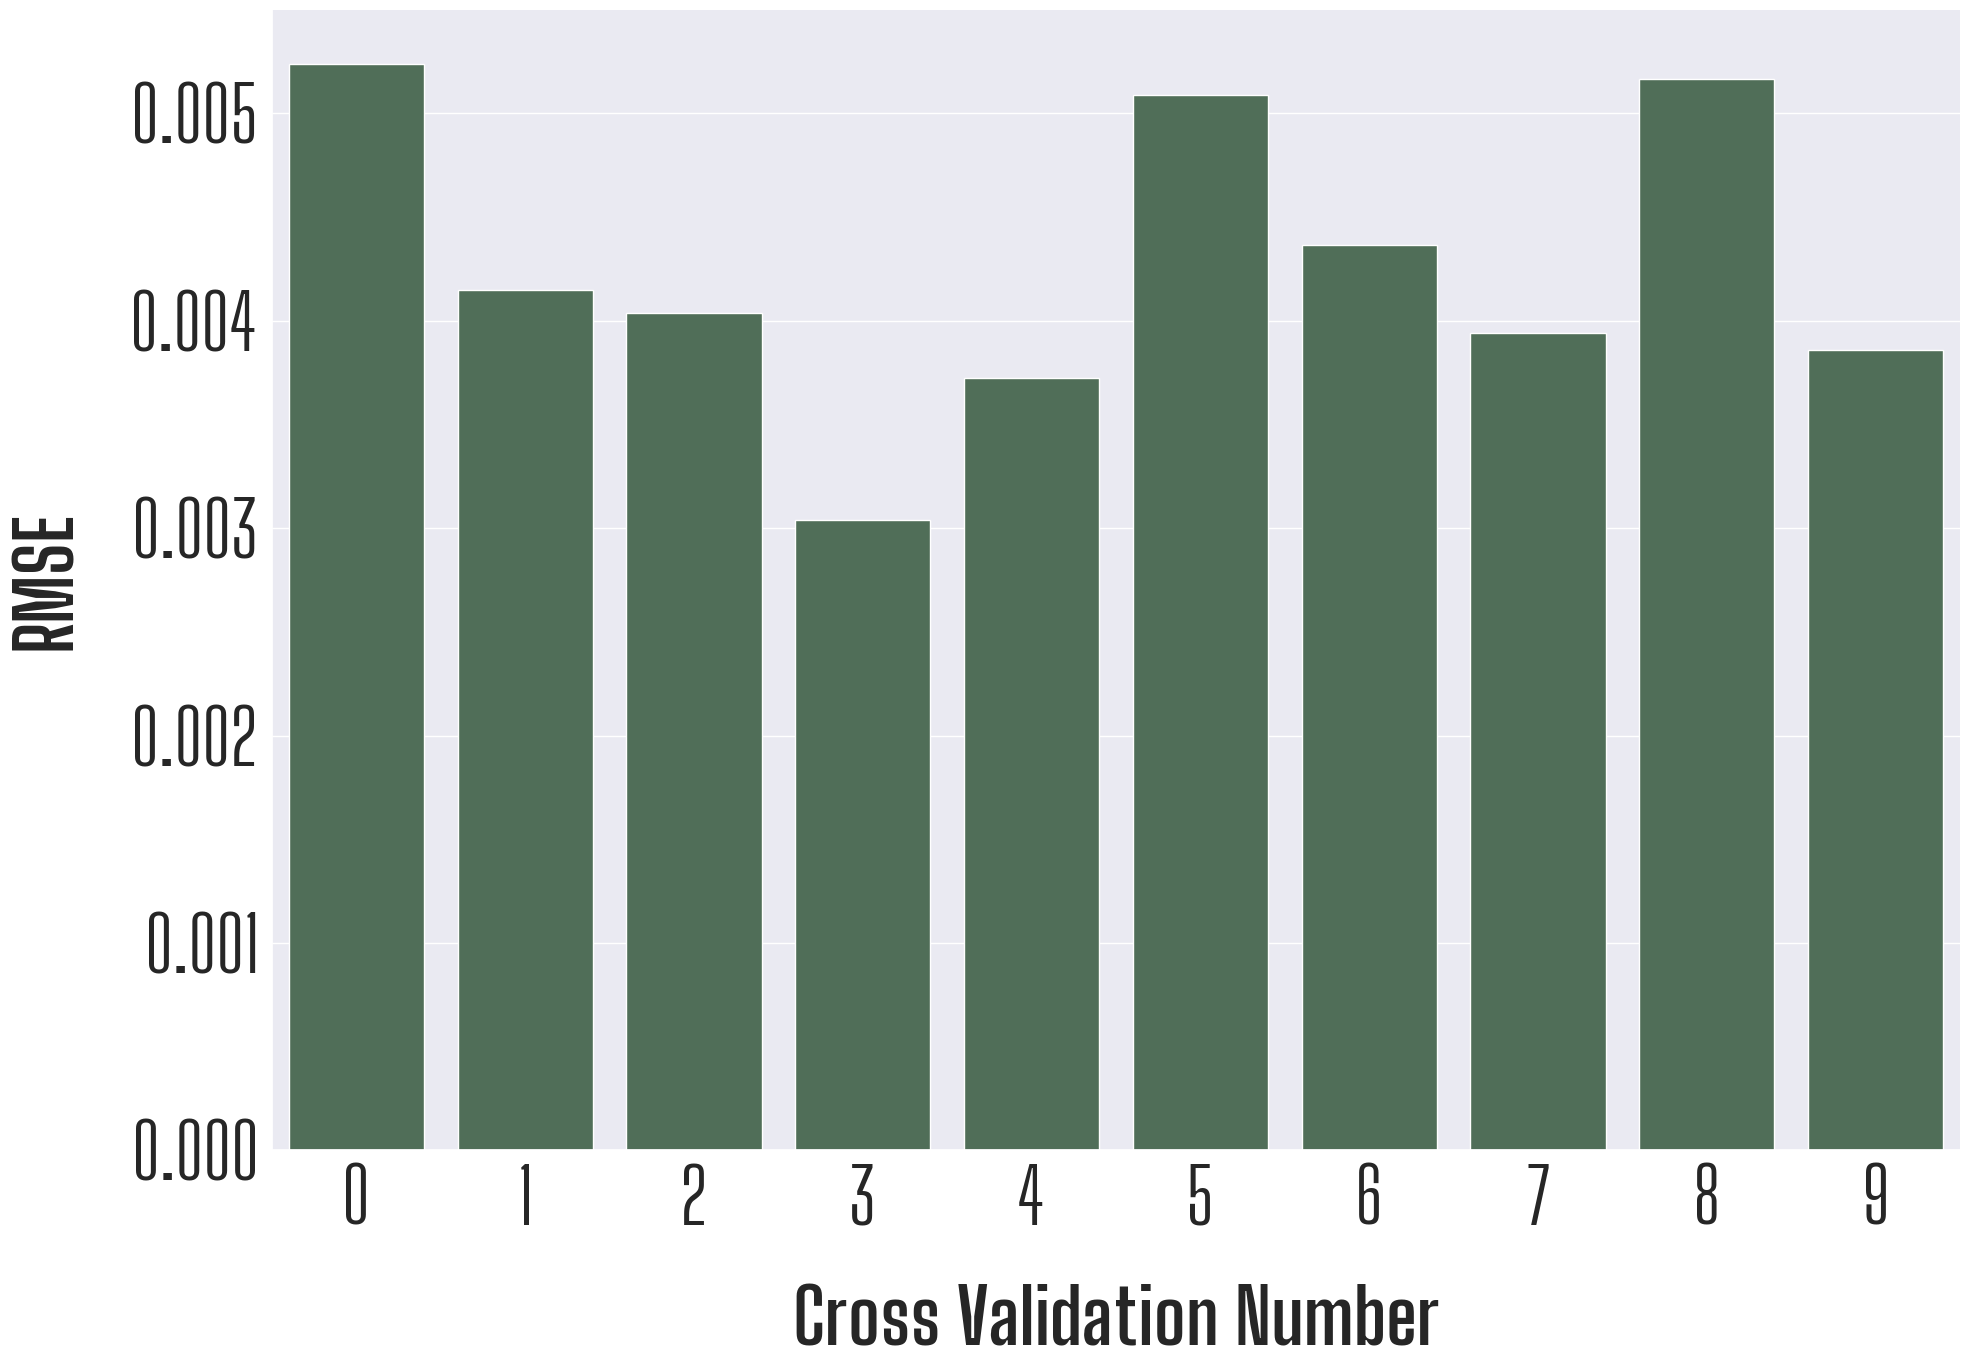

In [ ]:
sns.set_theme()
plt.figure(figsize=(20, 14))
sns.barplot(x=np.arange(len(scores)), y=-scores, color='#4B7355', alpha=1)
plt.xlabel('Cross Validation Number', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('RMSE', fontsize=54, fontweight='bold', labelpad=32, ** font)

plt.xticks(np.arange(len(scores)), fontsize=54, **font)
plt.yticks(fontsize=54, **font)
# plt.yticks(np.arange(0, max(-scores)+1, 0.001))

sns.despine(top=True, right=True)

plt.tight_layout(pad=1.5)

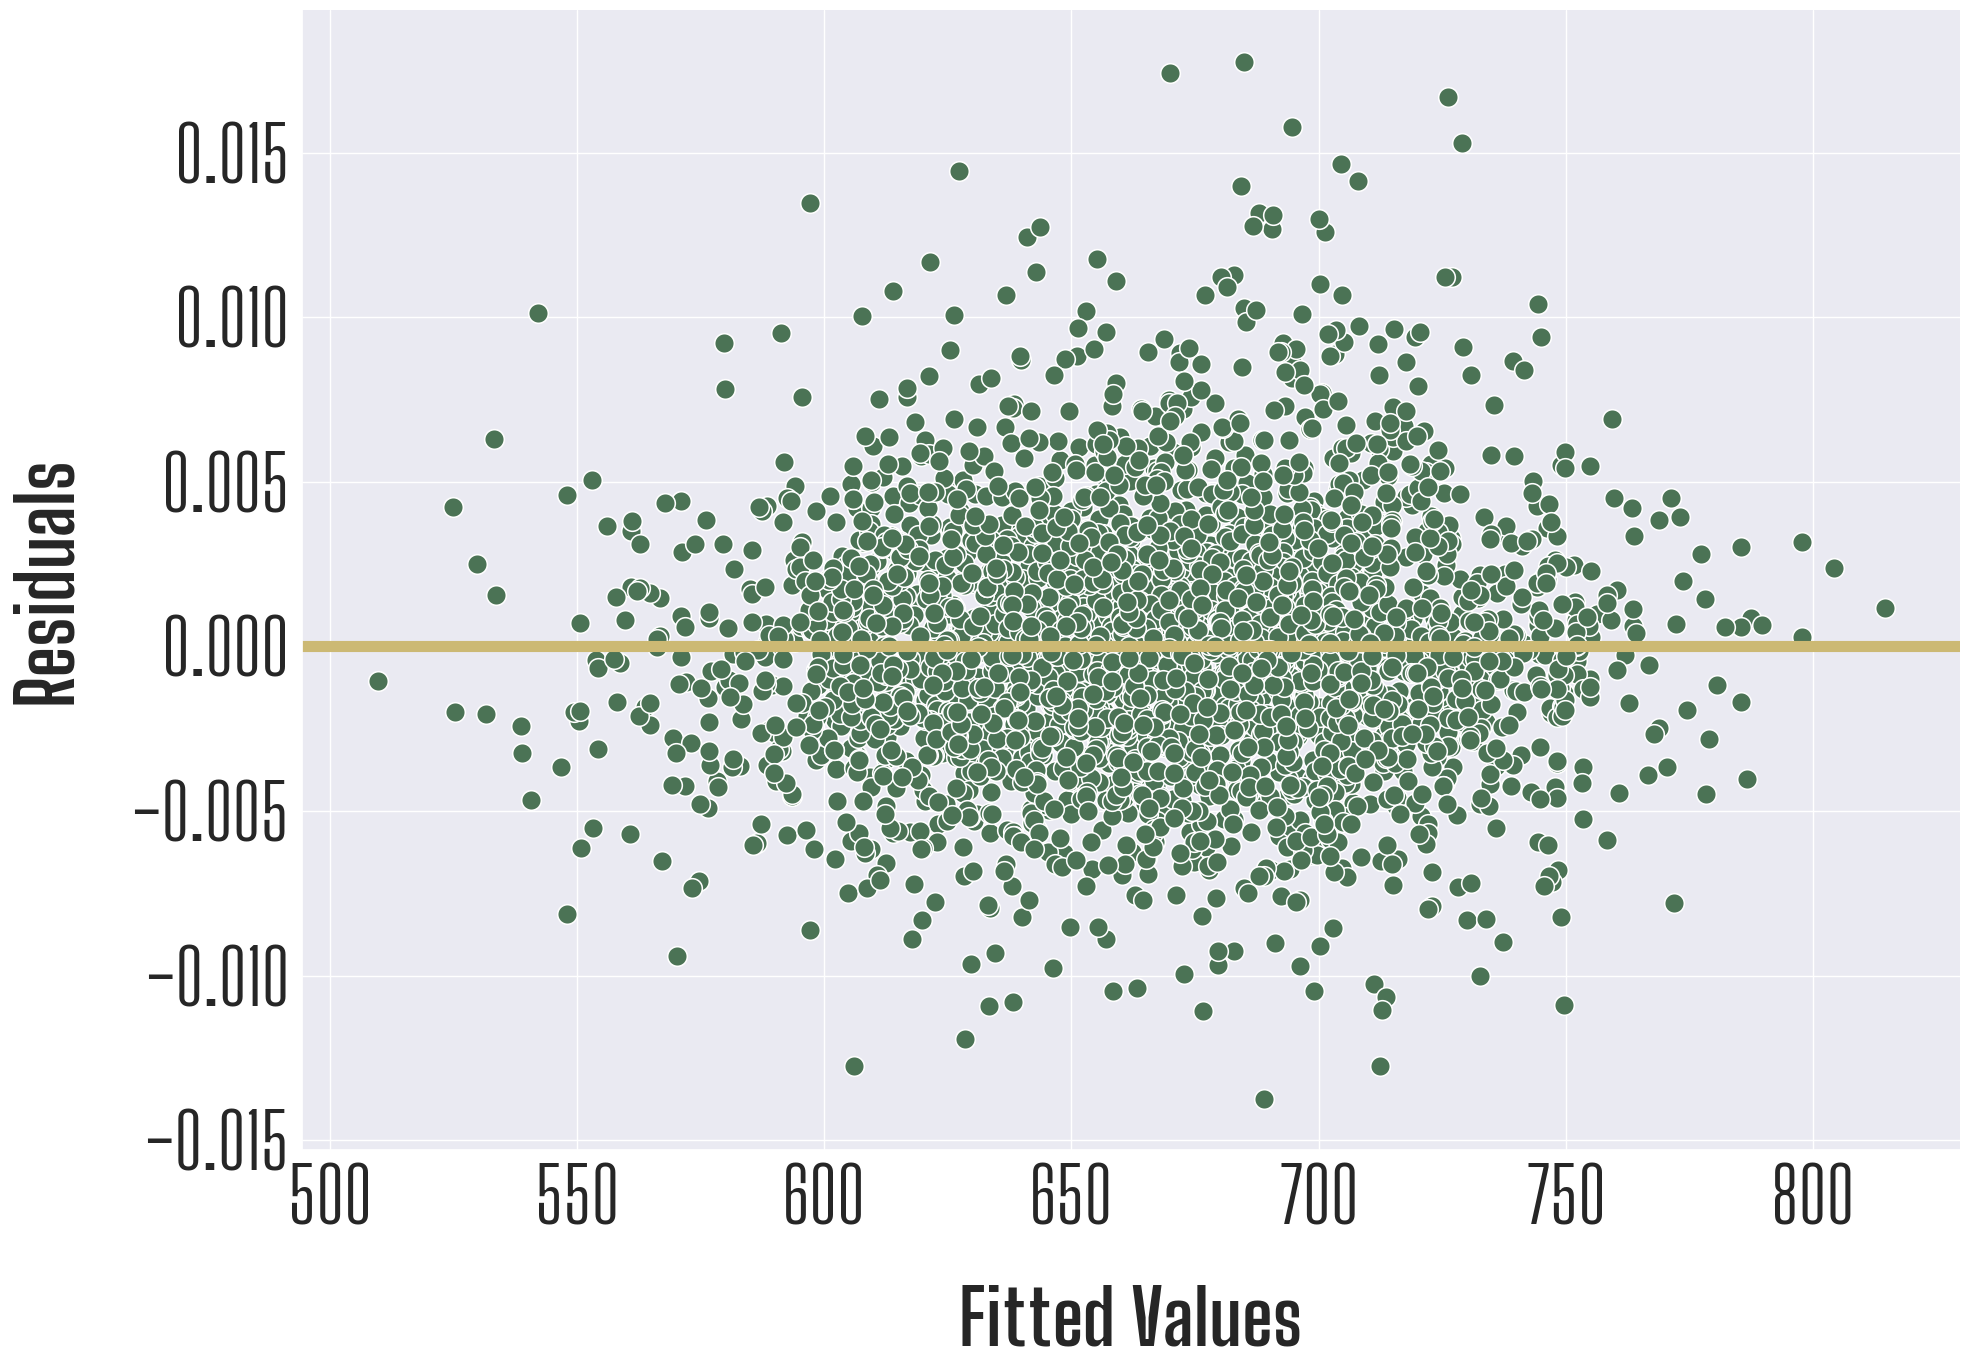

In [ ]:
residuals = y_val - predictions

sns.set_theme()
plt.figure(figsize=(20, 14))

sns.scatterplot(x=predictions, y=residuals, color='#4B7355', s=200)  # s is the size of the markers

plt.axhline(y=0, color='y', linestyle='-', linewidth=8)

plt.xlabel('Fitted Values', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Residuals', fontsize=54, fontweight='bold', labelpad=32, **font)

plt.xticks(fontsize=54, **font)
plt.yticks(fontsize=54, **font)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.5)

plt.show()

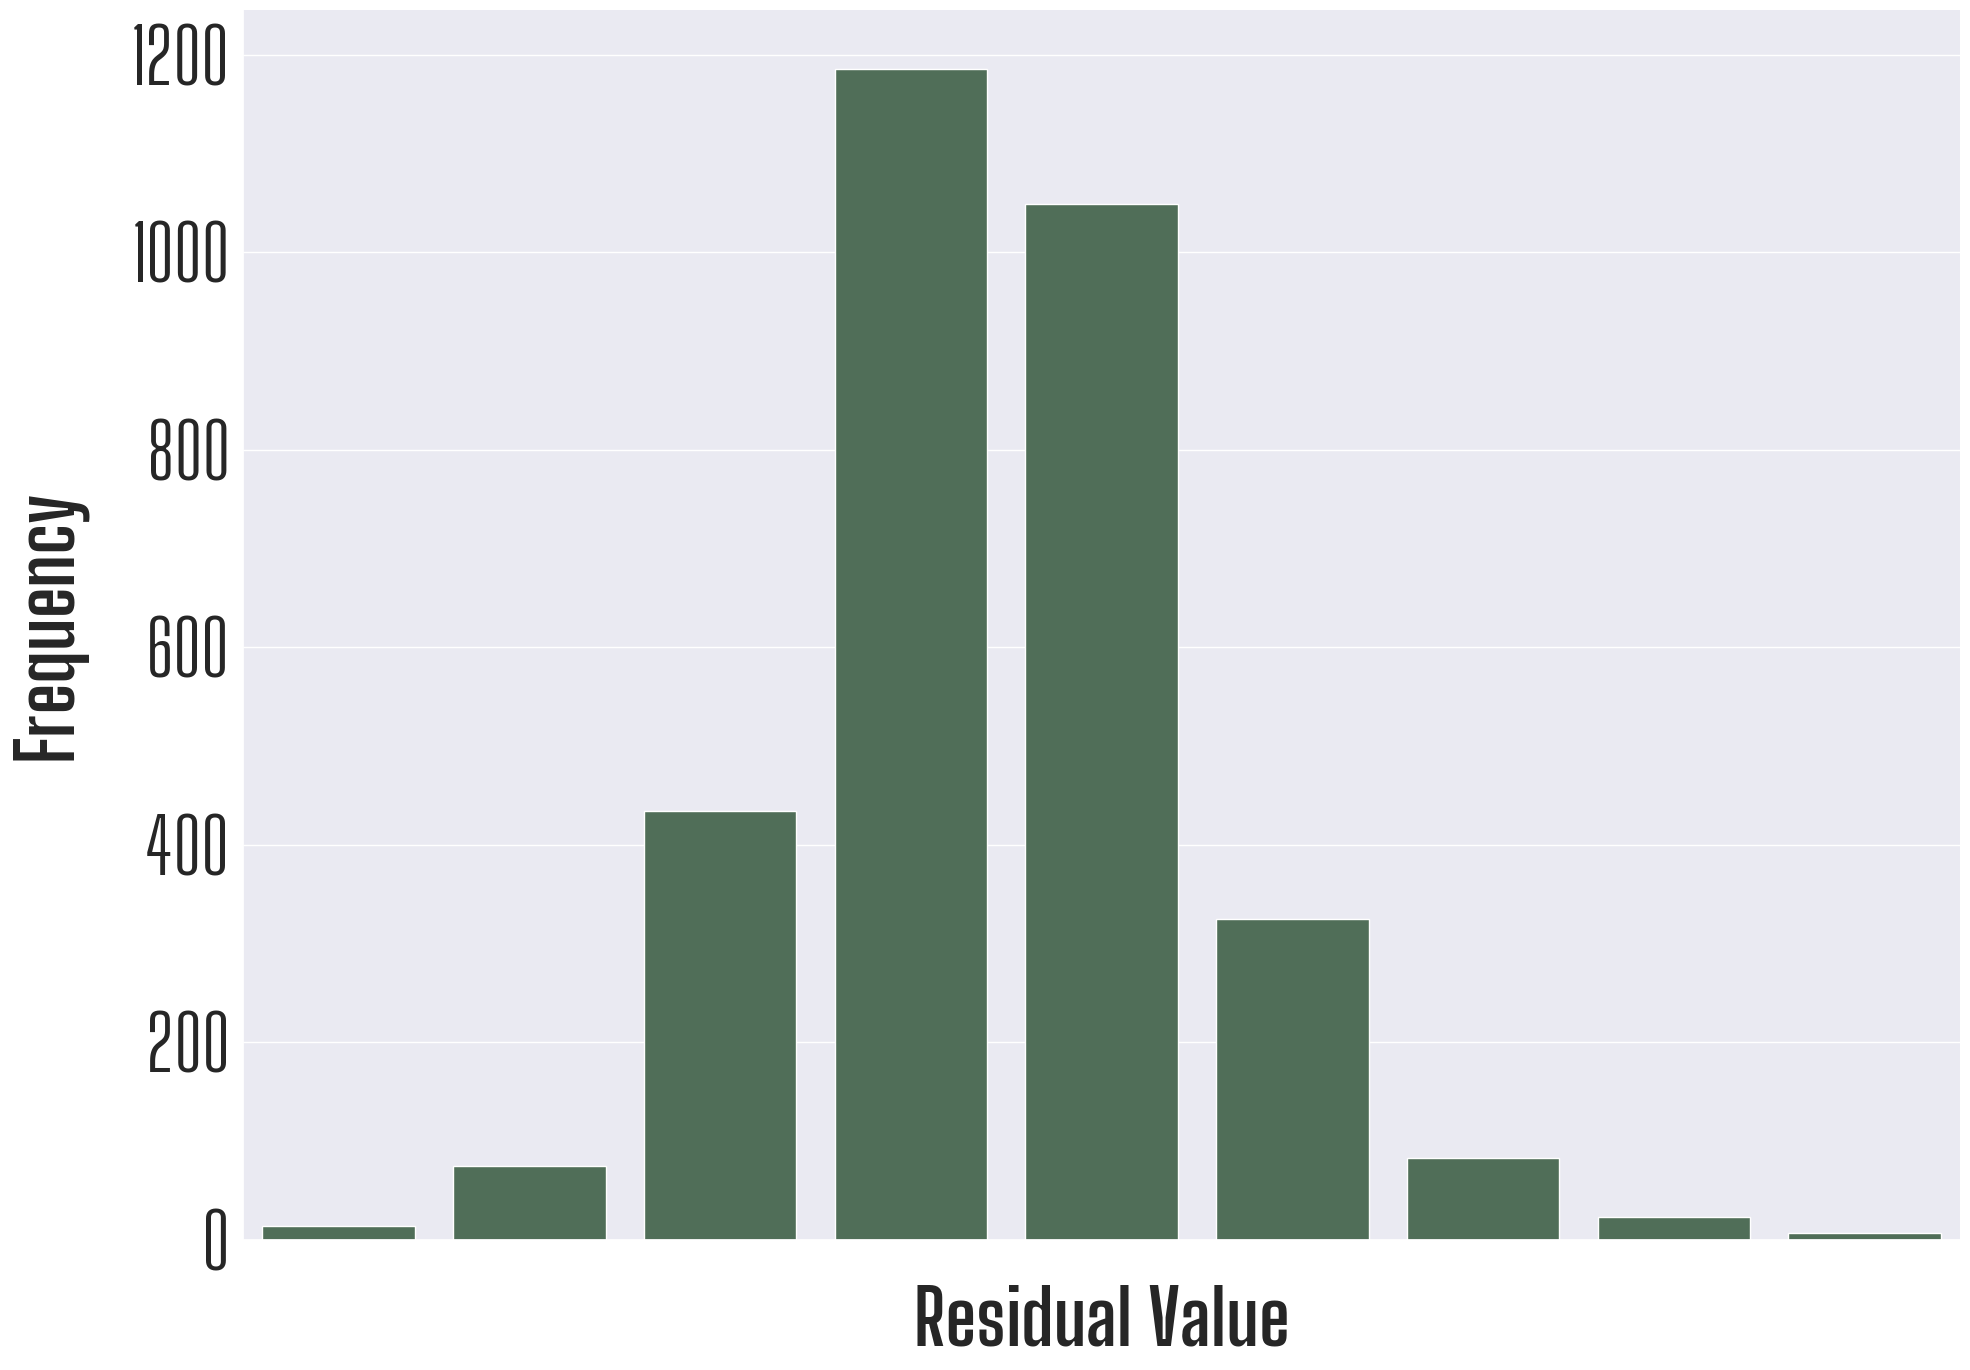

In [ ]:
bins = np.linspace(np.min(residuals), np.max(residuals), 10)
hist, bin_edges = np.histogram(residuals, bins=bins)

sns.set_theme()
plt.figure(figsize=(20, 14))

sns.barplot(x=bin_edges[:-1], y=hist, color='#4B7355', alpha=1)

plt.xlabel('Residual Value', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Frequency', fontsize=54, fontweight='bold', labelpad=32, **font)

plt.xticks([])
plt.yticks(fontsize=54, **font)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.5)
plt.show()

In [ ]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)

print("Shapiro-Wilk Test statistic:", shapiro_test.statistic)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test statistic: 0.9863389134407043
Shapiro-Wilk Test p-value: 5.187332339381292e-17


<Figure size 2000x1400 with 0 Axes>

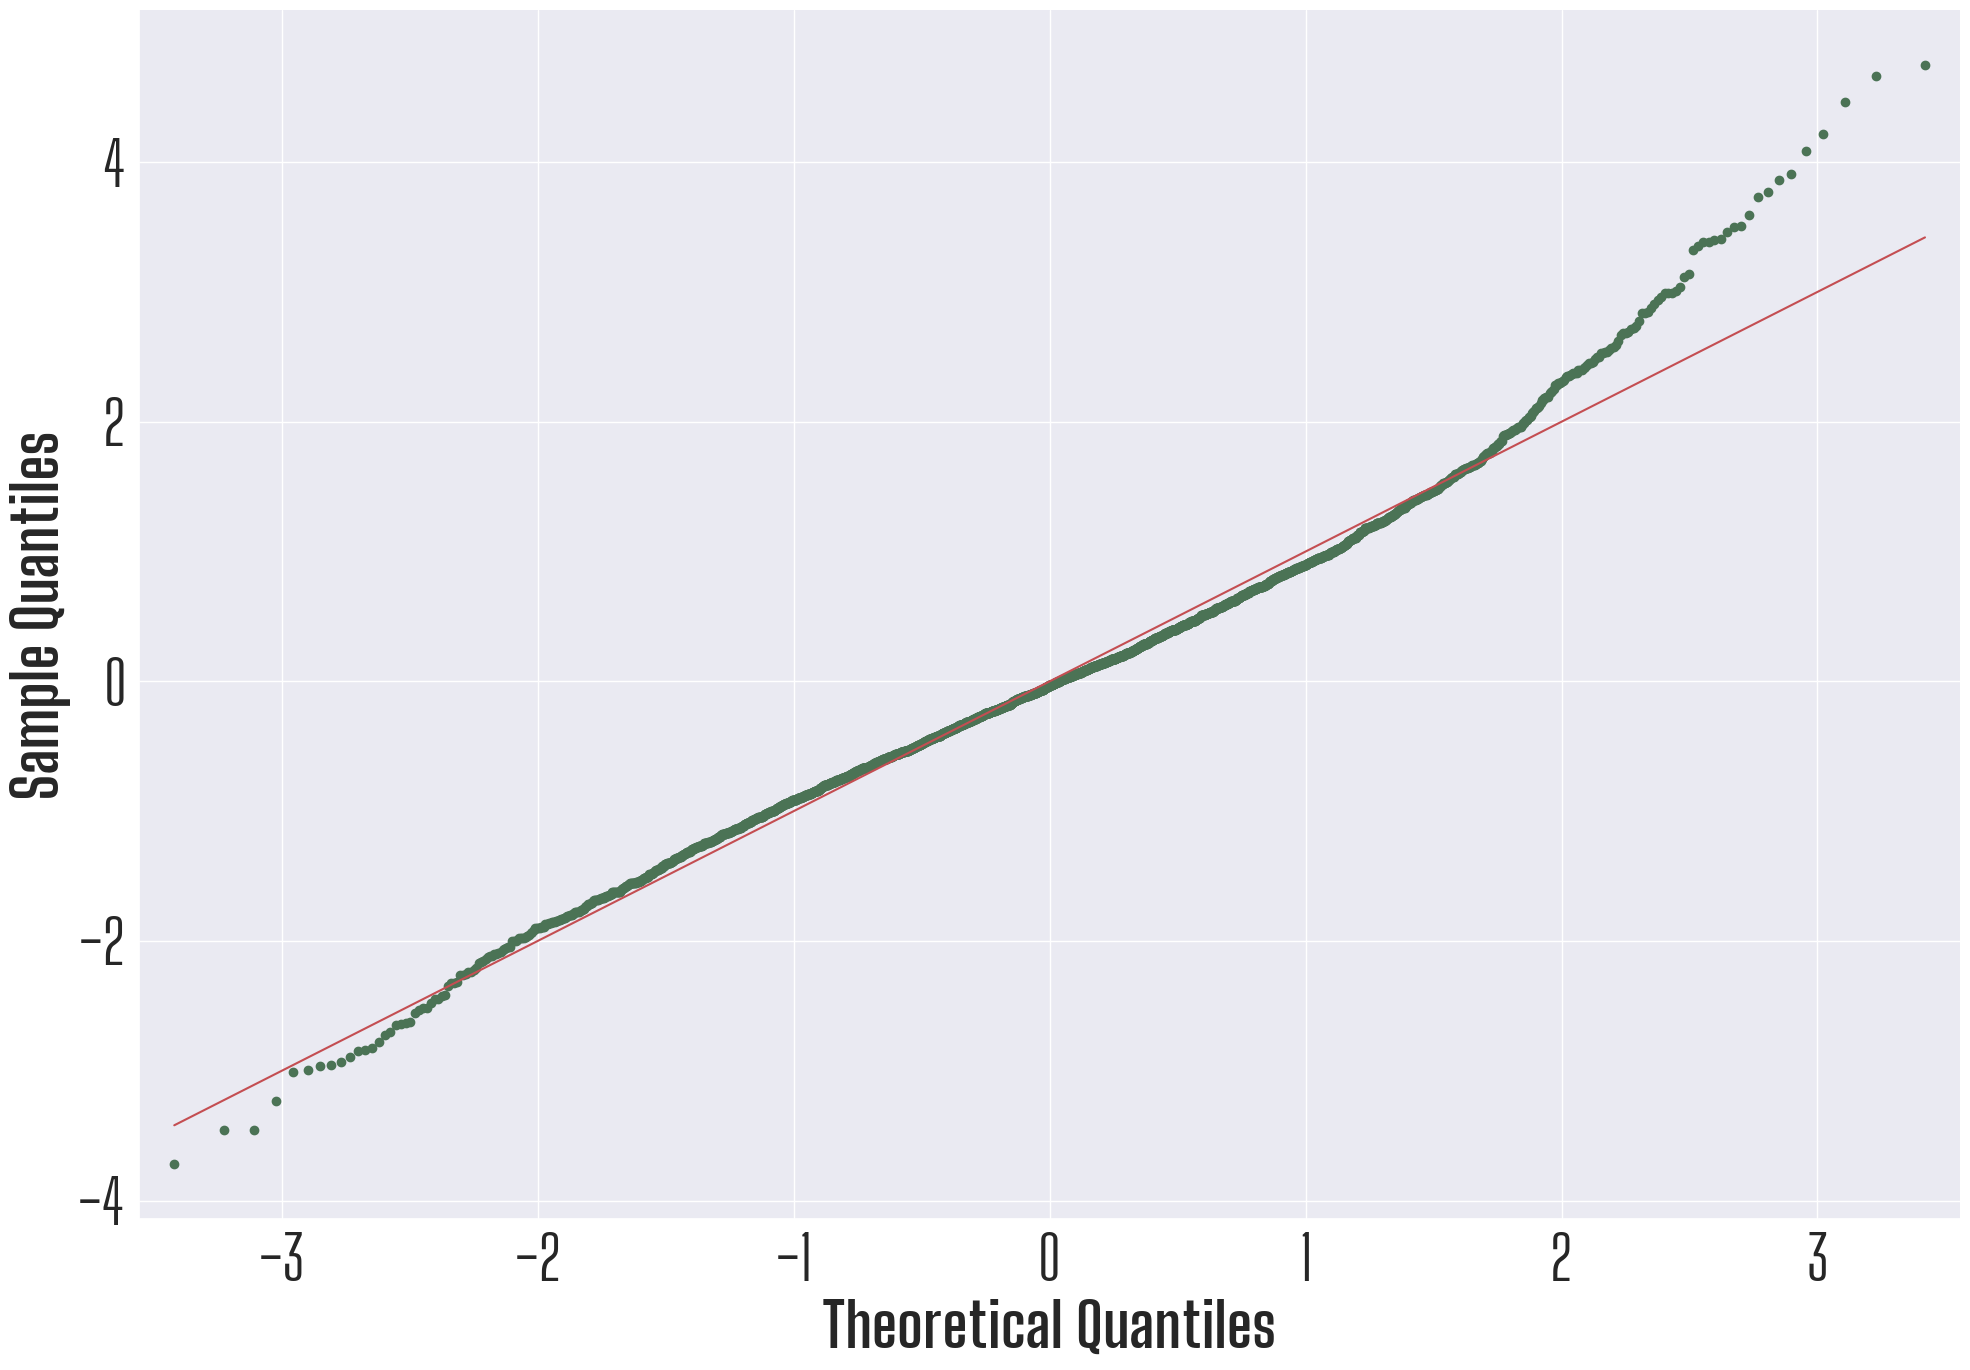

In [ ]:
import statsmodels.api as sm

sns.set_theme()
plt.figure(figsize=(20, 14))

fig, ax = plt.subplots(figsize=(20, 14))
qq = sm.qqplot(residuals, line='s', fit=True, ax=ax, marker='o', markerfacecolor='#4B7355', markeredgecolor='#4B7355')
ax.set_xlabel('Theoretical Quantiles', fontsize=44, fontweight='bold', **font)
ax.set_ylabel('Sample Quantiles', fontsize=44, fontweight='bold', **font)

plt.xticks(fontsize=44, **font)
plt.yticks(fontsize=44, **font)

sns.despine(top=True, right=True)

plt.tight_layout(pad=1.5)
plt.show()

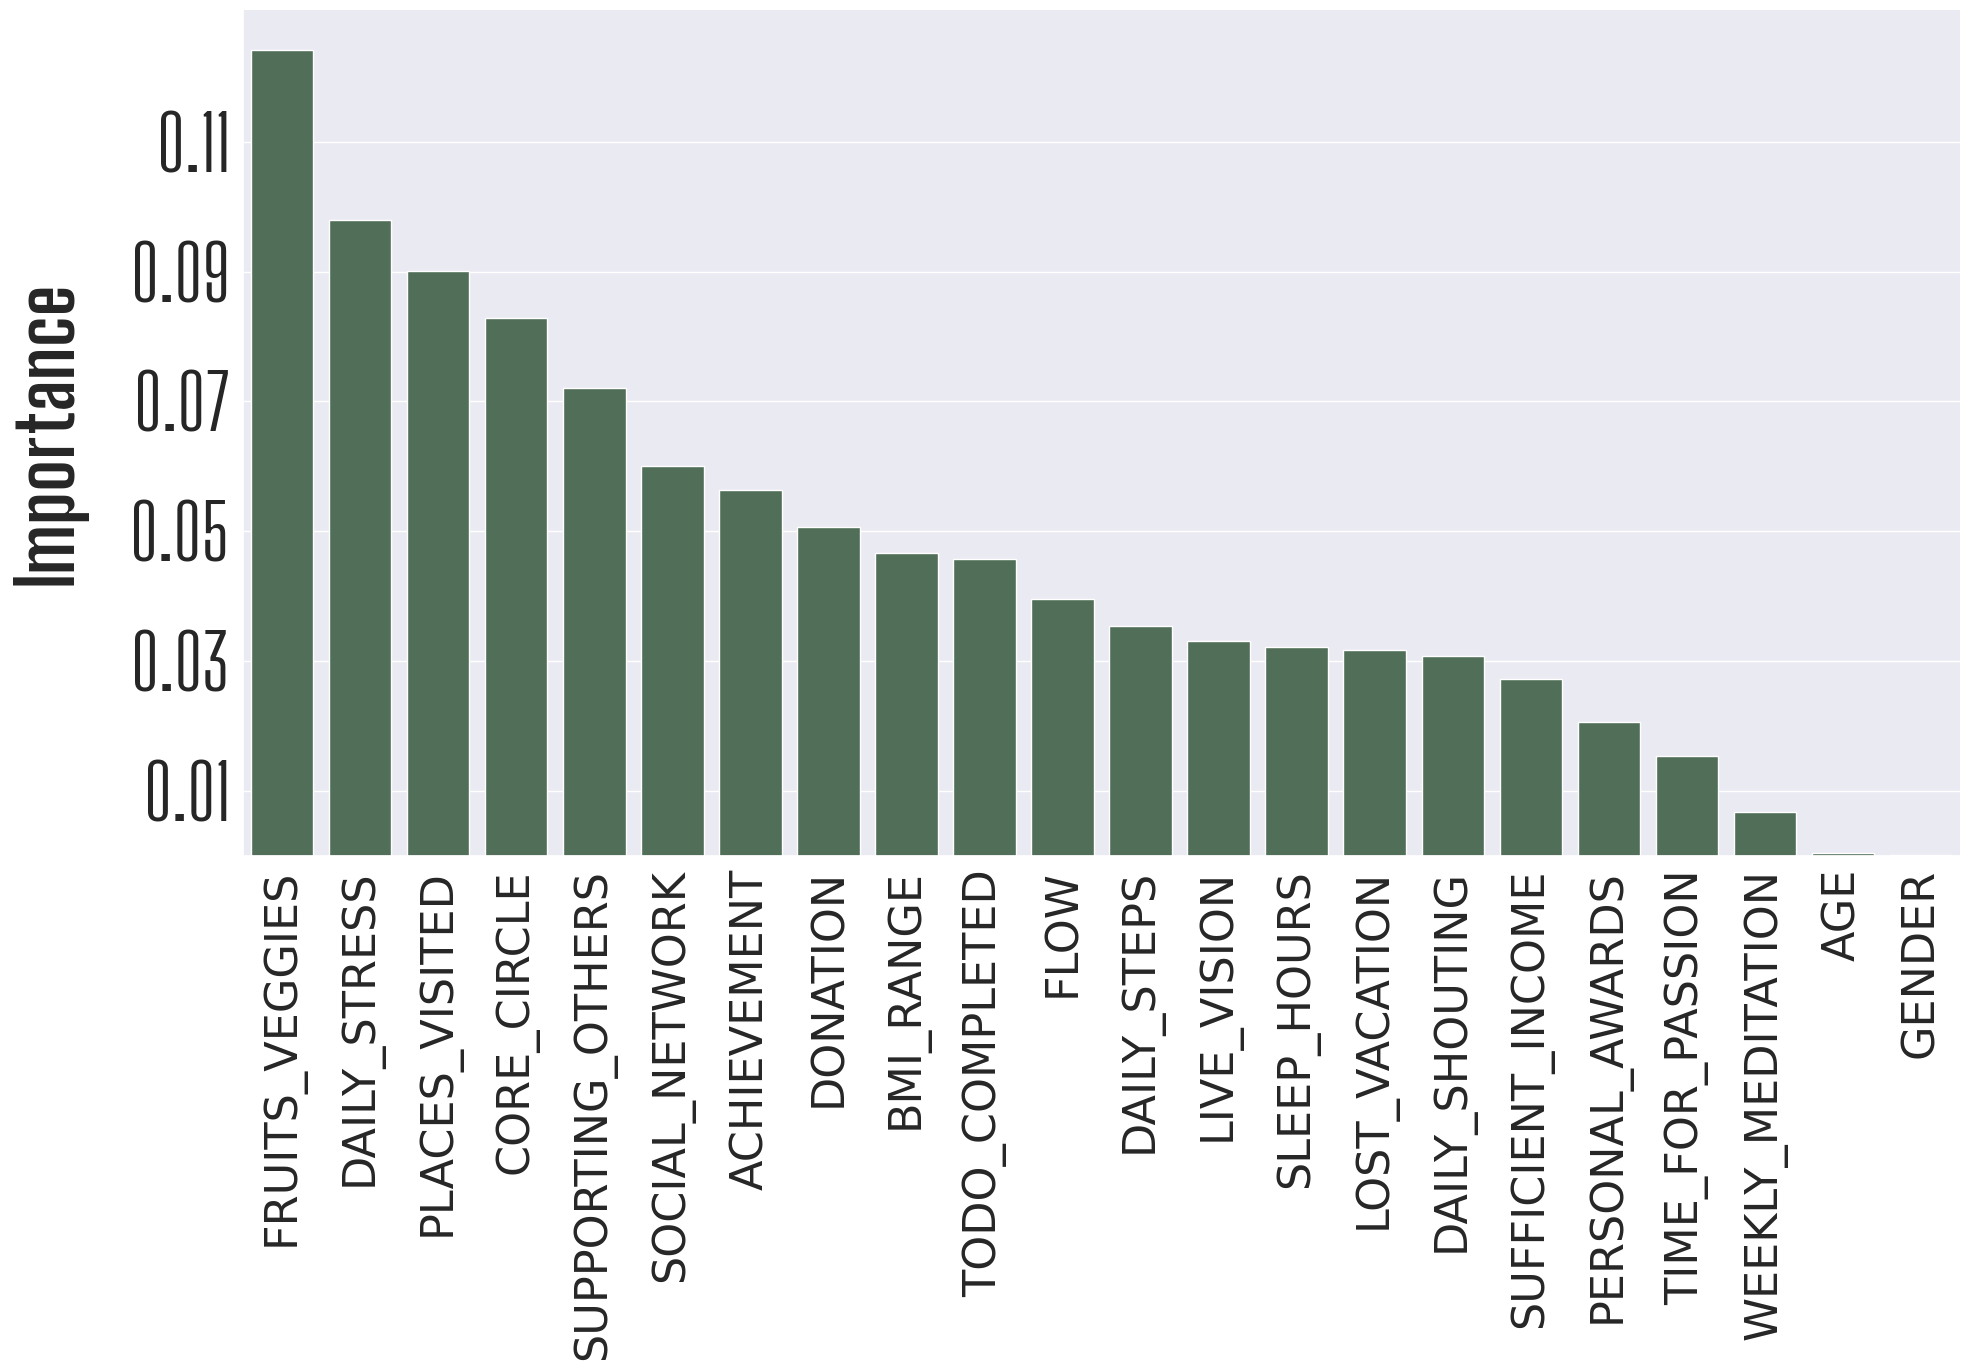

In [ ]:
importances = xgb_regressor.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

sns.set_theme()
plt.figure(figsize=(20, 14))
sns.barplot(x=feature_names, y=importances[indices], color='#4B7355', alpha=1)

# plt.title('Feature Importances', fontsize=54, fontweight='bold', pad=32)
plt.xlabel('', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Importance', fontsize=54, fontweight='bold', labelpad=32, **font)

plt.xticks(fontsize=32, rotation=90)
plt.yticks([0.01, 0.03, 0.05, 0.07, 0.09, 0.11], fontsize=54, **font)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.5)

# Importing and cleaning prediction dataset

In [ ]:
# In order to maintain the confidentiality of responces,
# we removed the column with emails/nicknames externally
#
# Survey_responses.csv file should be attached to the submission in moodle

survey_dataset_path = '/content/Survey_responses.csv'
survey_df = pd.read_csv(survey_dataset_path)

survey_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER
0,4/3/2024 9:07:09,0,2,10,5,4,8,9,3,2,...,1,7,7,3,1,7,6,0,Less than 20,Female
1,4/3/2024 9:08:12,3,10,5,5,8,10,7,4,1,...,4,3,3,4,1,3,6,4,Less than 20,Male
2,4/3/2024 9:13:32,1,3,7,3,2,10,2,1,1,...,0,0,0,10,1,2,0,2,Less than 20,Female
3,4/3/2024 9:14:48,4,10,8,5,9,10,10,6,2,...,2,10,10,0,2,5,4,3,Less than 20,Female
4,4/3/2024 9:15:02,5,2,10,3,10,7,4,6,1,...,2,0,0,5,2,10,2,4,Less than 20,Female


In [ ]:
survey_df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.888889,4.592593,7.333333,5.574074,5.592593,6.888889,4.648148,3.648148,1.12963,6.407407,3.962963,6.407407,2.388889,5.074074,5.074074,4.222222,1.462963,5.629630,2.925926,3.537037
std,1.396311,2.930120,2.754071,2.805667,2.987512,2.911698,2.836137,2.020250,0.33905,2.167674,2.162833,2.831884,2.708593,4.625001,4.625001,3.277520,0.503308,3.551754,2.463713,2.523198
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,1.00000,5.000000,3.000000,5.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000
50%,1.000000,4.000000,8.000000,5.000000,5.000000,7.000000,4.000000,3.000000,1.00000,7.000000,3.500000,6.000000,1.500000,6.500000,6.500000,3.500000,1.000000,5.000000,2.000000,3.000000
75%,3.000000,6.750000,10.000000,7.750000,8.750000,10.000000,6.750000,6.000000,1.00000,8.000000,5.000000,9.000000,3.750000,10.000000,10.000000,7.000000,2.000000,10.000000,5.000000,5.000000
max,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000


In [ ]:
survey_df.drop(['Timestamp'], axis=1, inplace=True)

label_encoder_age = LabelEncoder()
label_encoder_gender = LabelEncoder()

survey_df['AGE'] = label_encoder_age.fit_transform(survey_df['AGE'])
survey_df['GENDER'] = label_encoder_gender.fit_transform(survey_df['GENDER'])

survey_df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER
0,0,2,10,5,4,8,9,3,2,3,...,1,7,7,3,1,7,6,0,3,0
1,3,10,5,5,8,10,7,4,1,7,...,4,3,3,4,1,3,6,4,3,1
2,1,3,7,3,2,10,2,1,1,7,...,0,0,0,10,1,2,0,2,3,0
3,4,10,8,5,9,10,10,6,2,7,...,2,10,10,0,2,5,4,3,3,0
4,5,2,10,3,10,7,4,6,1,7,...,2,0,0,5,2,10,2,4,3,0


# XGBoost Regression | Survey Score Prediction

In [ ]:
predictions = xgb_regressor.predict(survey_df)

data_vertical = np.array(predictions).reshape(-1, 1)
scores_column_df = pd.DataFrame(data_vertical)


scores_column_df['Category'] = pd.cut(predictions, bins=ten_bins, labels=[f"{i+1}" for i in range(10)])
# scores_column_df.head()
scores_column_df.to_csv('survey_score_prediction.csv', index=False, header=False)

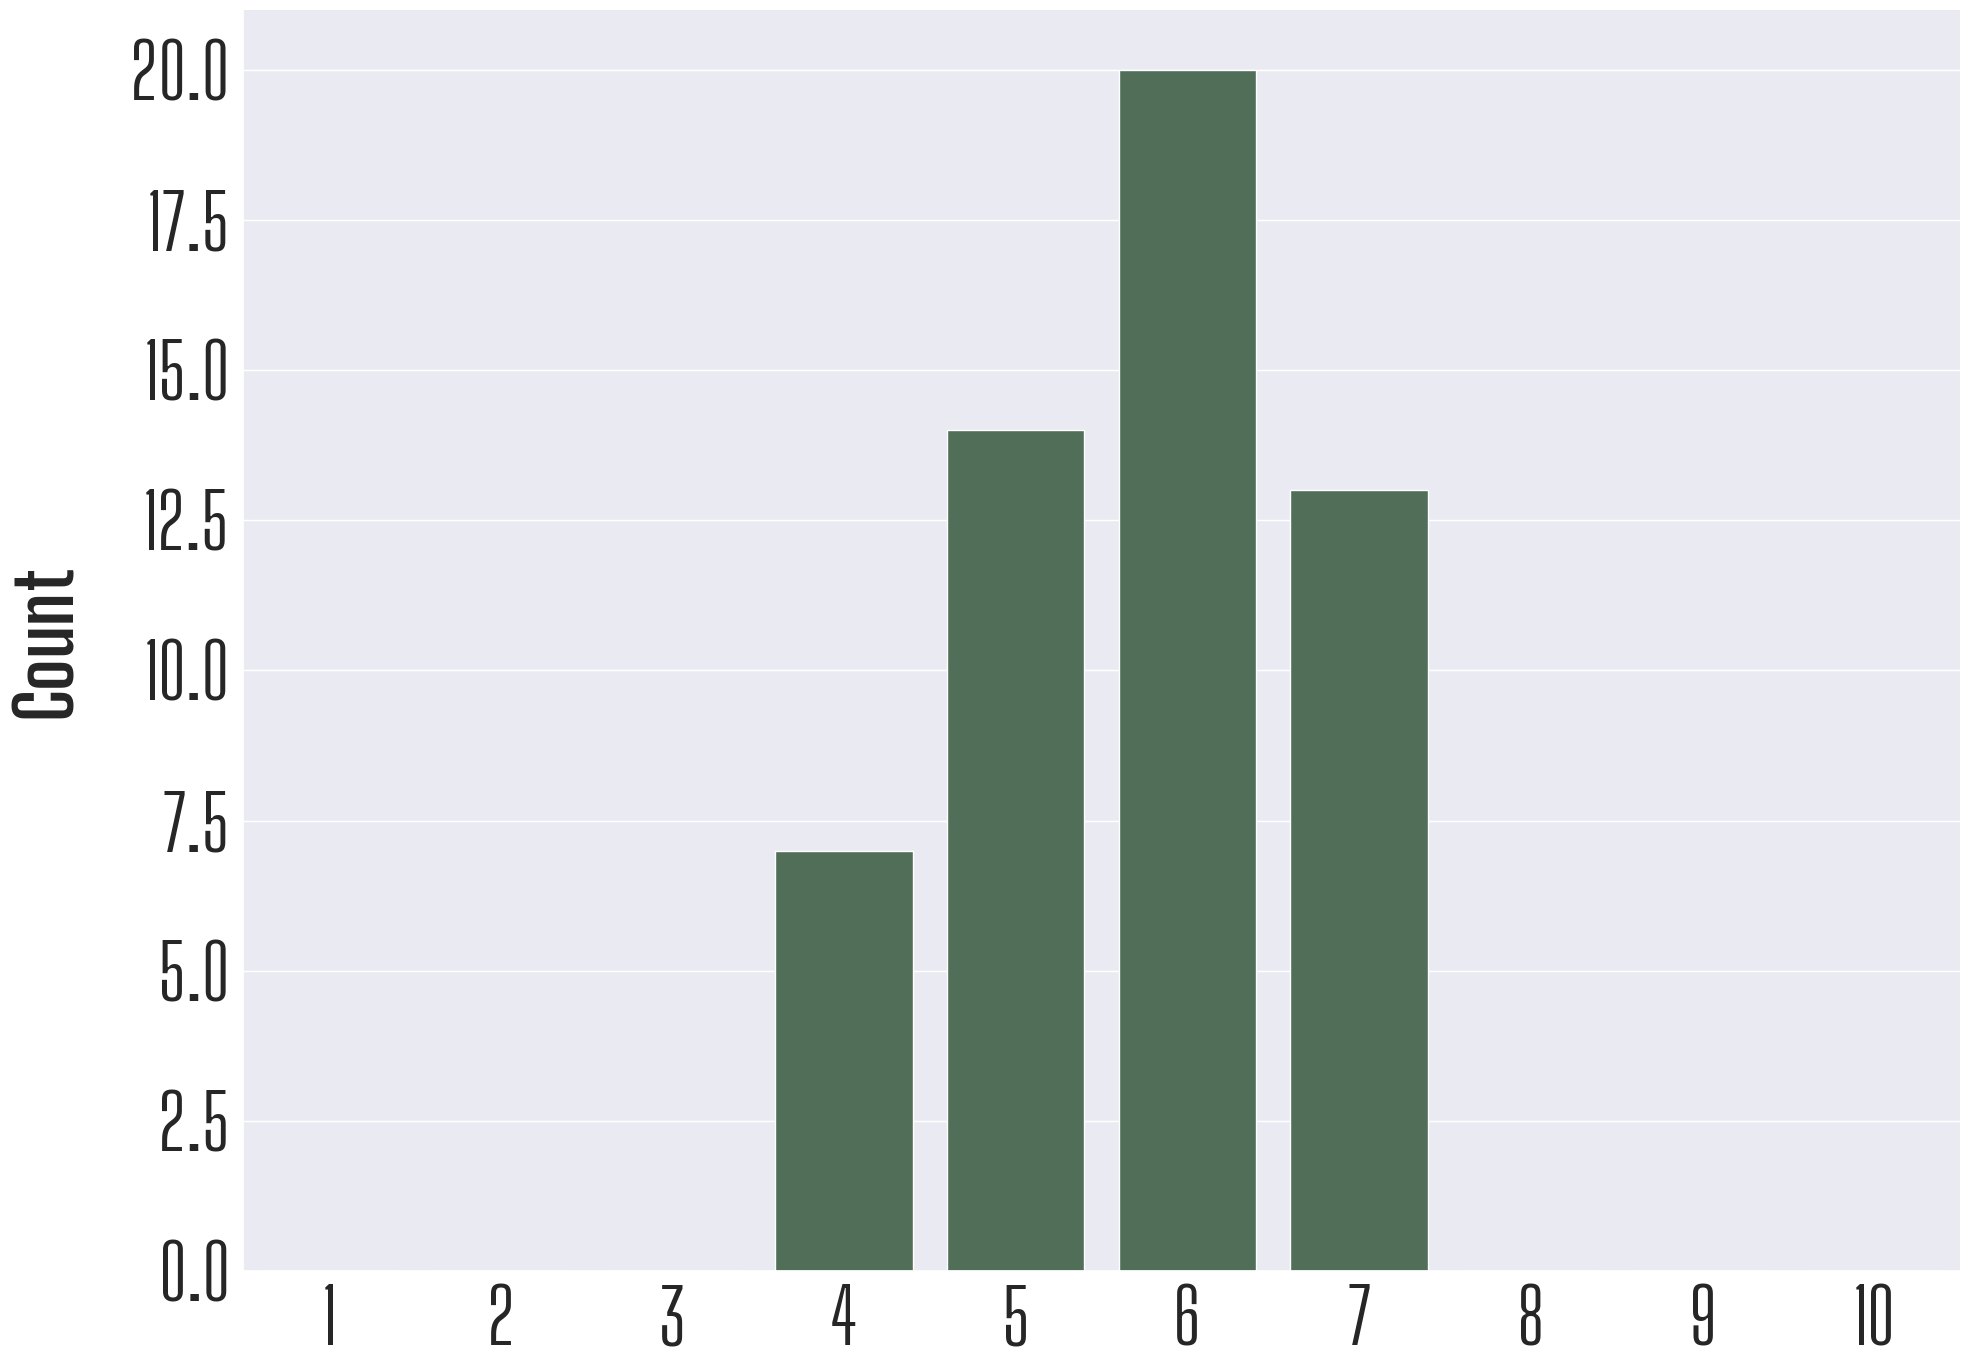

In [ ]:
sns.set_theme()
plt.figure(figsize=(20, 14))
sns.barplot(x=scores_column_df['Category'].value_counts().index,
            y=scores_column_df['Category'].value_counts().values,
            color='#4B7355', alpha=1)

plt.xlabel('', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Count', fontsize=54, fontweight='bold', labelpad=32, **font)

plt.xticks(fontsize=54, **font)
plt.yticks(fontsize=54, **font)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.5)

plt.show()

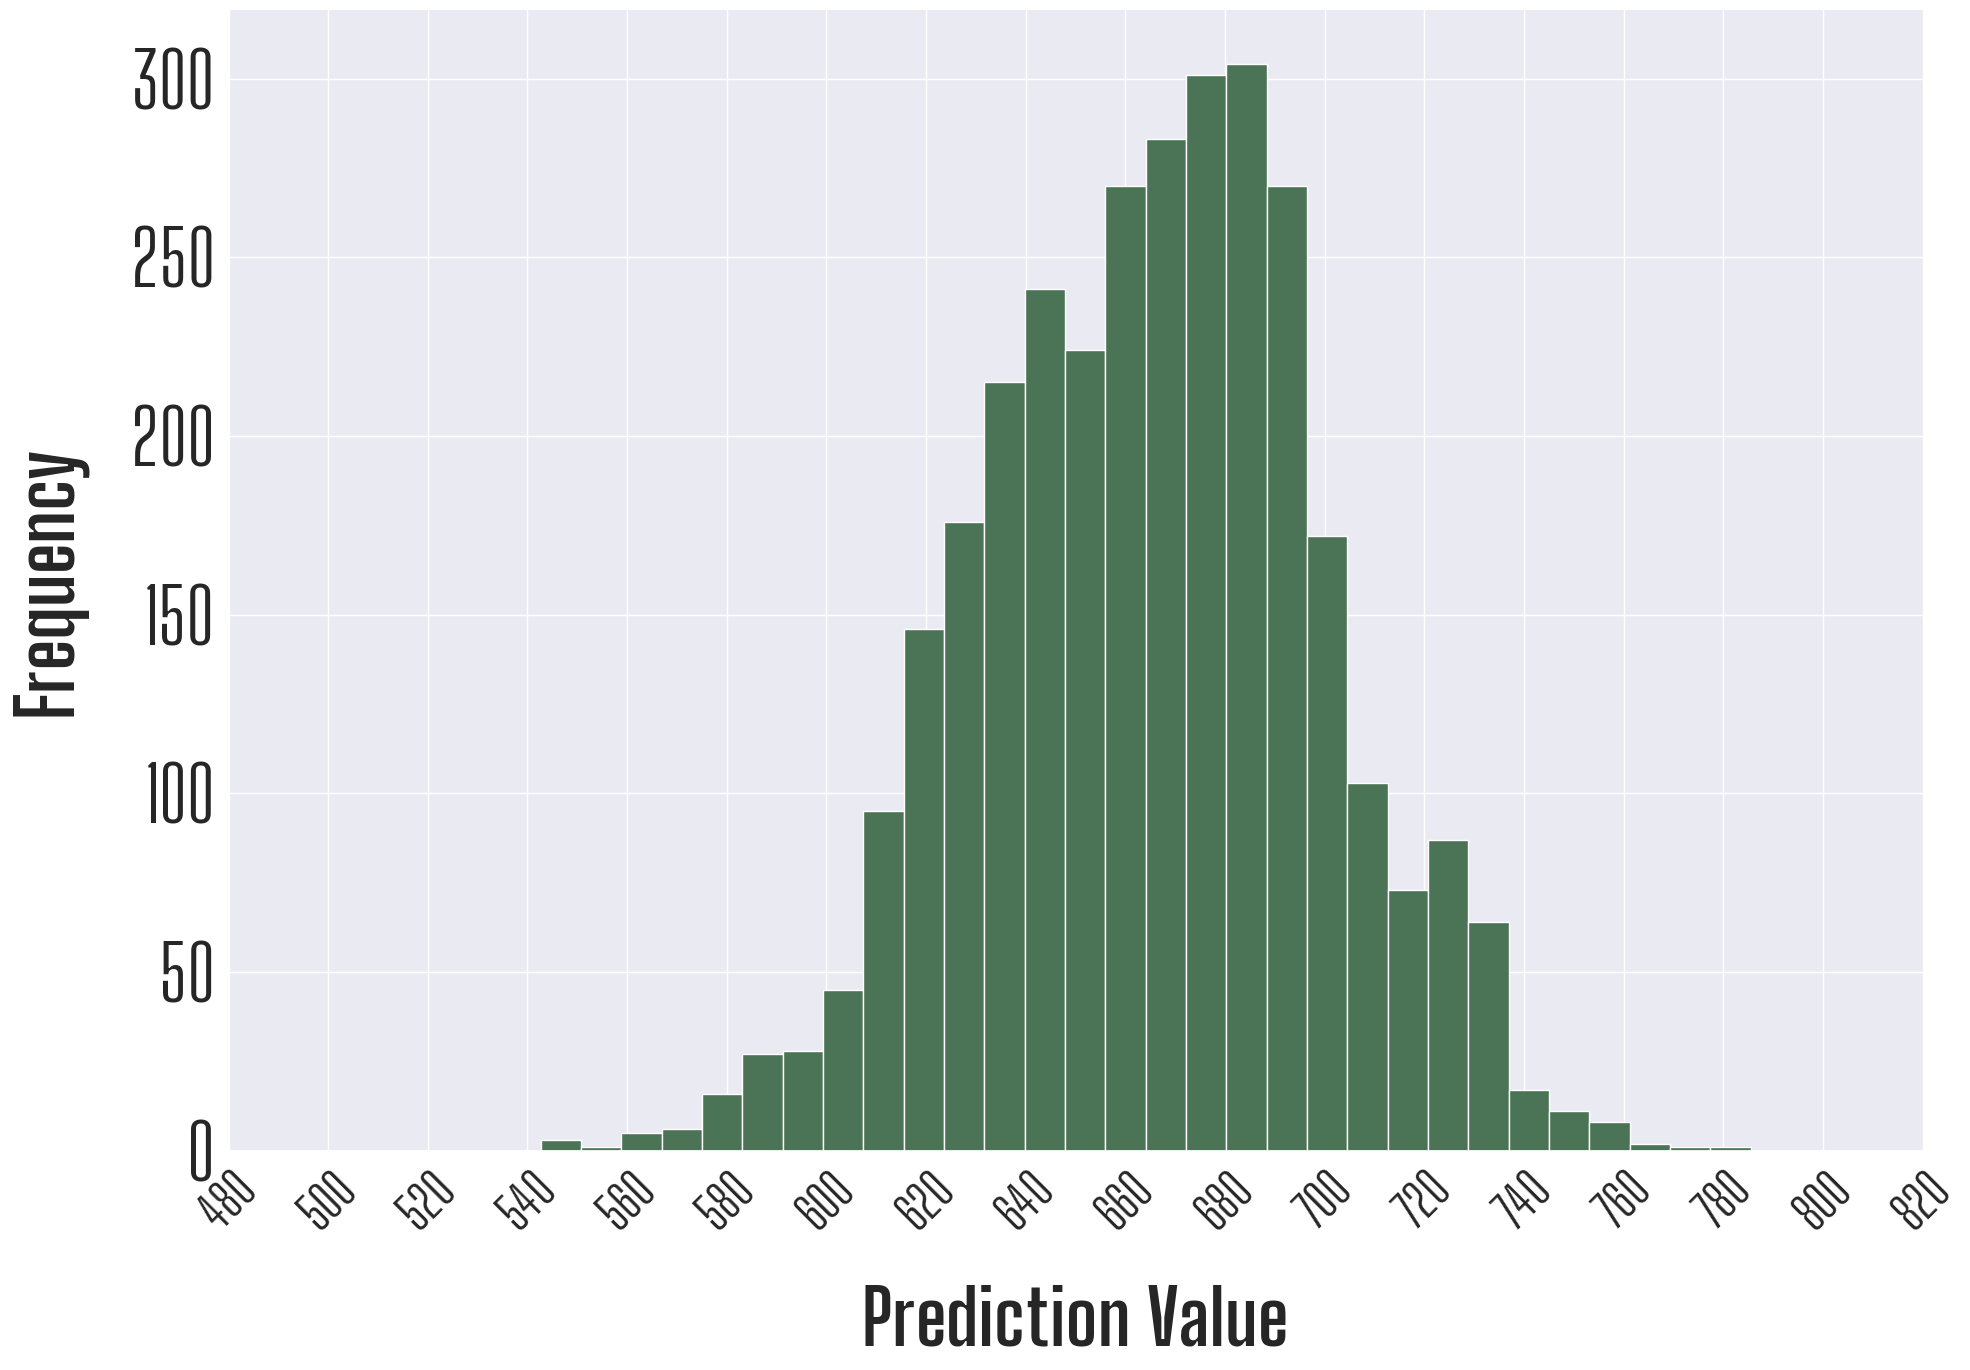

In [ ]:
plt.figure(figsize=(20, 14))
sns.histplot(predictions, bins=30, color='#4B7355', alpha=1)

plt.xlabel('Prediction Value', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Frequency', fontsize=54, fontweight='bold', labelpad=32, **font)

plt.xticks(np.arange(480, 821, 20), fontsize=36, rotation=45, **font)
plt.yticks(fontsize=54, **font)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.5)

plt.show()

# Classification (Legacy)

## Prepare Dataset for Classification

In [ ]:
kaggle_df_final_binned = kaggle_df_final.copy(deep=True)

bins = [kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE'].min() - 1, 636, 698.5, kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE'].max()]
labels = ['Low', 'Mid', 'High']
kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE_BINNED'] = pd.cut(kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE'], bins=bins, labels=labels)

# # THis approach worked worse, even with different number of quantiles
# number_of_quantiles = 4
# kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE_BINNED'] = pd.qcut(kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE'], q=number_of_quantiles, labels=[f'Quantile_{i+1}' for i in range(number_of_quantiles)])

kaggle_df_final_binned = kaggle_df_final_binned.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)

In [ ]:
kaggle_df_final_binned.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE_BINNED
0,3.0,2,2.0,5.0,0.0,5.0,2.0,0.0,1.0,6.0,...,7.0,5.0,5.0,1.0,4.0,0.0,5.0,1,0,Low
1,2.0,3,4.0,3.0,8.0,10.0,5.0,2.0,2.0,5.0,...,8.0,2.0,2.0,2.0,3.0,2.0,6.0,1,0,Mid
2,2.0,3,3.0,4.0,4.0,10.0,3.0,2.0,2.0,2.0,...,8.0,10.0,2.0,2.0,4.0,8.0,3.0,1,0,Low
3,3.0,3,10.0,3.0,10.0,7.0,2.0,5.0,2.0,3.0,...,5.0,7.0,5.0,1.0,5.0,2.0,0.0,2,0,Low
4,5.0,1,3.0,3.0,10.0,4.0,2.0,4.0,2.0,5.0,...,7.0,0.0,0.0,2.0,8.0,1.0,5.0,2,0,Mid


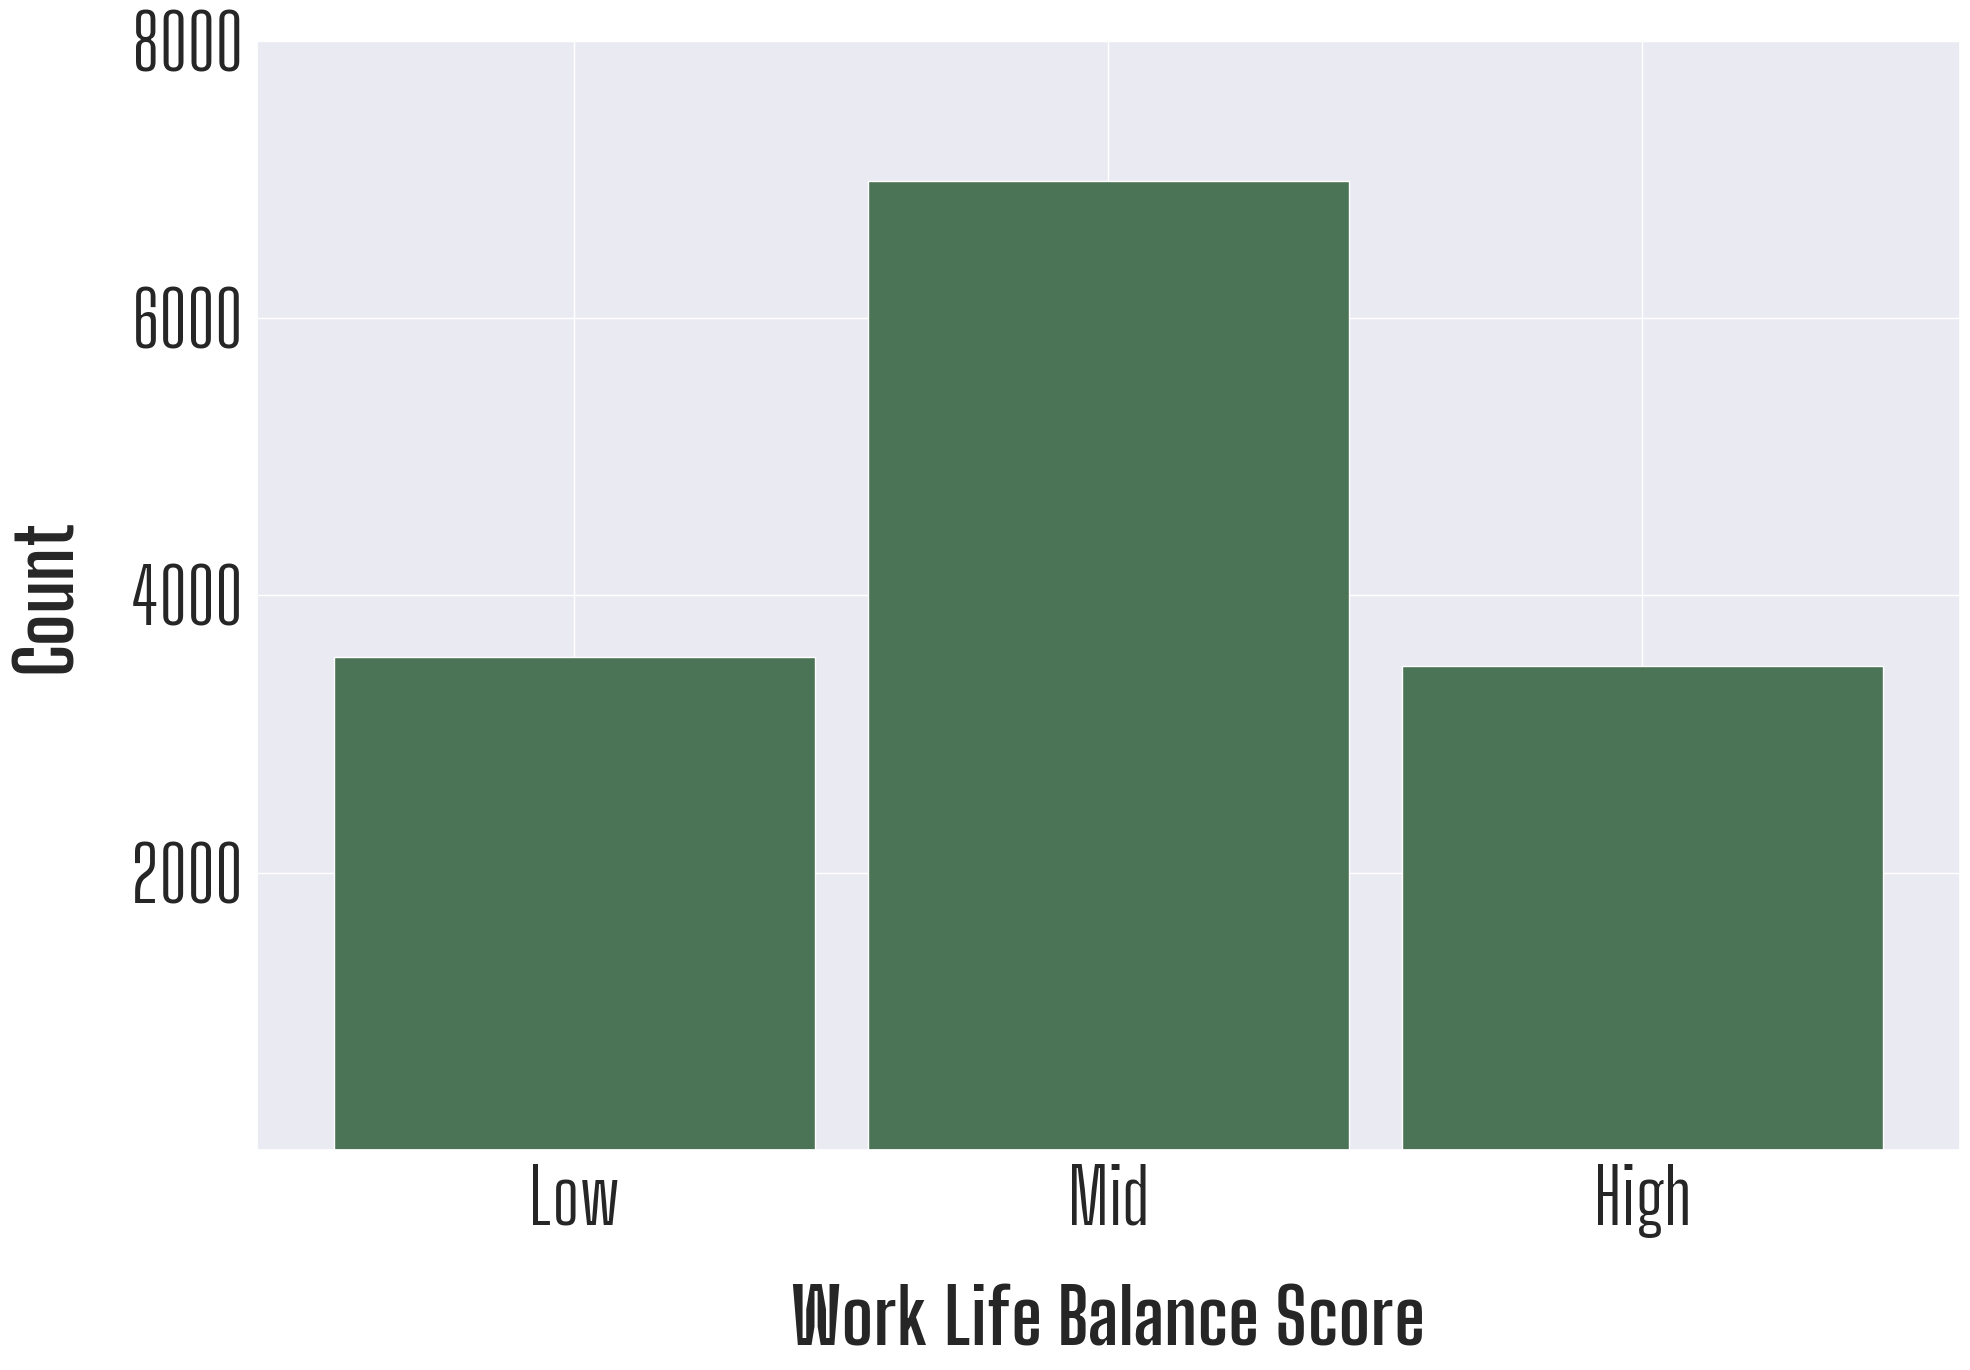

In [ ]:
sns.set_theme()
plt.figure(figsize=(20, 14))
sns.histplot(kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE_BINNED'], color='#4B7355', shrink=0.9, alpha=1)
plt.xlabel('Work Life Balance Score', fontsize=54, fontweight='bold', labelpad=32, **font)
plt.ylabel('Count', fontsize=54, fontweight='bold', labelpad=32, ** font)

plt.xticks(fontsize=54, **font)
plt.yticks([2000, 4000, 6000, 8000], fontsize=54, **font)

plt.tight_layout(pad=1.5)

In [ ]:
bin_encoder = LabelEncoder()
kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE_BINNED'] = bin_encoder.fit_transform(kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE_BINNED'])

In [ ]:
bin_encoder.inverse_transform([0, 1, 2])

array(['High', 'Low', 'Mid'], dtype=object)

In [ ]:
kaggle_df_final_binned.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE_BINNED
0,3.0,2,2.0,5.0,0.0,5.0,2.0,0.0,1.0,6.0,...,7.0,5.0,5.0,1.0,4.0,0.0,5.0,1,0,1
1,2.0,3,4.0,3.0,8.0,10.0,5.0,2.0,2.0,5.0,...,8.0,2.0,2.0,2.0,3.0,2.0,6.0,1,0,2
2,2.0,3,3.0,4.0,4.0,10.0,3.0,2.0,2.0,2.0,...,8.0,10.0,2.0,2.0,4.0,8.0,3.0,1,0,1
3,3.0,3,10.0,3.0,10.0,7.0,2.0,5.0,2.0,3.0,...,5.0,7.0,5.0,1.0,5.0,2.0,0.0,2,0,1
4,5.0,1,3.0,3.0,10.0,4.0,2.0,4.0,2.0,5.0,...,7.0,0.0,0.0,2.0,8.0,1.0,5.0,2,0,2


In [ ]:
X_binned = kaggle_df_final_binned.drop('WORK_LIFE_BALANCE_SCORE_BINNED', axis=1)
y_binned = kaggle_df_final_binned['WORK_LIFE_BALANCE_SCORE_BINNED']

X_binned_train, X_binned_val, y_binned_train, y_binned_val = train_test_split(X_binned, y_binned, test_size=0.2, random_state=42)

## Random Forest Classification

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_binned_train, y_binned_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
y_binned_pred = rf_classifier.predict(X_binned_val)
report = classification_report(y_binned_val, y_binned_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       781
           1       0.95      0.85      0.90       768
           2       0.86      0.96      0.91      1646

    accuracy                           0.90      3195
   macro avg       0.92      0.87      0.89      3195
weighted avg       0.90      0.90      0.90      3195



In [ ]:
y_binned_train_pred = rf_classifier.predict(X_binned_train)
train_accuracy = accuracy_score(y_binned_train, y_binned_train_pred)

y_binned_test_pred = rf_classifier.predict(X_binned_val)
test_accuracy = accuracy_score(y_binned_val, y_binned_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

if train_accuracy > test_accuracy:
    print("There may be overfitting.")
else:
    print("The model generalizes well to new data.")

## [SKIP] Classify Survey with Random Forest

In [ ]:
# survey_predictions = rf_classifier.predict(survey_df)

# survey_predictions_df = pd.DataFrame({
#     'Predicted Work-Life Balance Score': survey_predictions
# })

# survey_predictions_df.head(), survey_predictions_df['Predicted Work-Life Balance Score'].value_counts()

In [ ]:
# survey_predictions_df.to_csv(r"/content/sample_data/RF_Prediction_Data")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# feature_importances = rf_classifier.feature_importances_
# sorted_indices = np.argsort(feature_importances)[::-1]
# labels = [X.columns[i] for i in sorted_indices]

# plt.figure(figsize=(12, 8))
# plt.title('Feature Importances in Predicting Work-Life Balance Score')
# plt.barh(range(X.shape[1]), feature_importances[sorted_indices], color='b', align='center')
# plt.yticks(range(X.shape[1]), labels)
# plt.xlabel('Relative Importance')
# plt.ylabel('Feature')
# # To show most important feature at the top
# plt.gca().invert_yaxis()
# plt.show()

## Gradient Boost Classification

In [ ]:
gb = GradientBoostingClassifier(n_estimators=1500, learning_rate=1.5, max_depth=1, random_state=42)
gb.fit(X_binned_train, y_binned_train)

GradientBoostingClassifier(learning_rate=1.5, max_depth=1, n_estimators=1500,
                           random_state=42)

In [ ]:
y_binned_pred = gb.predict(X_binned_val)

classification_rep = classification_report(y_binned_val, y_binned_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       781
           1       0.98      0.99      0.99       768
           2       0.99      0.98      0.99      1646

    accuracy                           0.99      3195
   macro avg       0.98      0.99      0.99      3195
weighted avg       0.99      0.99      0.99      3195



In [ ]:
y_binned_train_pred = gb.predict(X_binned_train)
train_accuracy = accuracy_score(y_binned_train, y_binned_train_pred)

y_binned_test_pred = gb.predict(X_binned_val)
test_accuracy = accuracy_score(y_binned_val, y_binned_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

if train_accuracy > test_accuracy:
    print("There may be overfitting.")
else:
    print("The model generalizes well to new data.")

Training Accuracy: 0.9977301189730745
Test Accuracy: 0.9859154929577465
There may be overfitting.


## AdaBoost Classification (Best Model)

### Model

In [ ]:
# 'SAMME.R' gives better result then 'SAMME', though 'SAMME.R' will be deprecated soon(((
ab_classifier = AdaBoostClassifier(algorithm='SAMME.R', n_estimators=1500, random_state=42)
ab_classifier.fit(X_binned_train, y_binned_train)

AdaBoostClassifier(n_estimators=1500, random_state=42)

In [ ]:
y_binned_pred = ab_classifier.predict(X_binned_val)

classification_rep = classification_report(y_binned_val, y_binned_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       706
           1       0.92      0.96      0.94       710
           2       0.97      0.92      0.95      1391

    accuracy                           0.95      2807
   macro avg       0.94      0.95      0.95      2807
weighted avg       0.95      0.95      0.95      2807



In [ ]:
y_binned_train_pred = ab_classifier.predict(X_binned_train)
train_accuracy = accuracy_score(y_binned_train, y_binned_train_pred)

y_binned_test_pred = ab_classifier.predict(X_binned_val)
test_accuracy = accuracy_score(y_binned_val, y_binned_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

if train_accuracy > test_accuracy:
    print("There may be overfitting.")
else:
    print("The model generalizes well to new data.")

Training Accuracy: 0.9424498886414254
Test Accuracy: 0.946918418240114
The model generalizes well to new data.


In [ ]:
scores = cross_val_score(ab_classifier, X_binned_train, y_binned_train, cv=10, scoring='accuracy')
print(scores)

[0.93677649 0.97862867 0.95102404 0.9492431  0.94746215 0.93315508
 0.94474153 0.93226381 0.92959002 0.94652406]


### Visualization

In [ ]:
y_true_one_hot = label_binarize(y_binned_val, classes=[0, 1, 2])
y_scores_dummy = label_binarize(np.array(y_binned_pred), classes=[0, 1, 2])

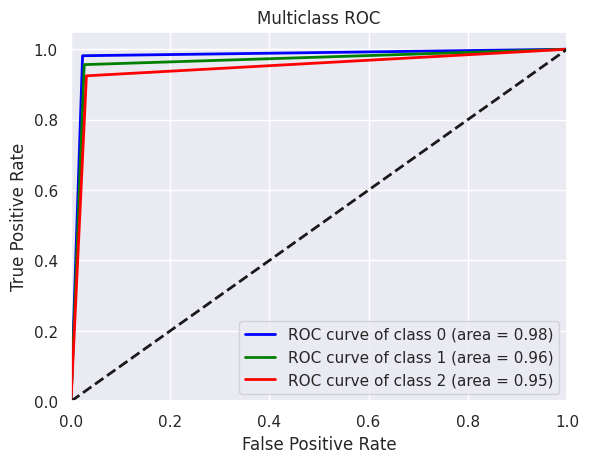

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_scores_dummy[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classification

In [ ]:
X_binned_train['DAILY_STRESS'] = pd.to_numeric(X_binned_train['DAILY_STRESS'], errors='coerce')
X_binned_val['DAILY_STRESS'] = pd.to_numeric(X_binned_val['DAILY_STRESS'], errors='coerce')

In [ ]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1500, max_depth=1, learning_rate=1.5, seed=42)
xgb_classifier.fit(X_binned_train, y_binned_train)

In [ ]:
y_binned_pred = xgb_classifier.predict(X_binned_val)

classification_rep = classification_report(y_binned_val, y_binned_pred)
print(classification_rep)

In [ ]:
y_binned_train_pred = xgb_classifier.predict(X_binned_train)
train_accuracy = accuracy_score(y_binned_train, y_binned_train_pred)

y_binned_test_pred = xgb_classifier.predict(X_binned_val)
test_accuracy = accuracy_score(y_binned_val, y_binned_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

if train_accuracy > test_accuracy:
    print("There may be overfitting.")
else:
    print("The model generalizes well to new data.")

# Additional points to consider



*   Try scikit's Pipeline object to make preprocessing for numeric and categorical values and simultaniously add a model to fit and predict the whole pipeline
*   Make a visual UI to input data (survey question answers), choose a model and its hyperparameters and get the plots and data output. Either make a Streamlit integreation, or download the trained model as a .pkl file from module pickle and then make a UI on tkinter on python